In [1]:
import pandas as pd
import numpy as np
import math
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
%matplotlib inline
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justinchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/mental_health_subreddits_dataset.csv')

In [4]:
df

,Unnamed: 0,subreddit.name,created_utc,body,sentiment
0,963,covid19_support,1635203992,This. Plus remember the poster in here a few w...,-0.6652
1,967,anxiety,1635203988,Currently 8 and a half months pregnant and als...,-0.8555
2,1142,anxiety,1635203613,Few people had COVID in my building and refuse...,-0.2960
3,1403,covid19_support,1635202948,My friend will be so relieved she didn't actua...,0.7626
4,1616,depression,1635202459,This hits close to home. \n\nHe sounds similar...,-0.4006
...,...,...,...,...,...
45879,17777050,anxiety,1581473713,"It is quite interesting, in terms of somewhat ...",-0.9256
45880,17777094,anxiety,1581466598,Stay focused on what the experts are saying an...,0.7430
45881,17777113,anxiety,1581463547,"No new COVID-19 cases in B.C., 4 confirmed pat...",-0.1531
45882,17777197,mentalhealth,1581454025,"Hi mate, as someone with GAD I can relate to y...",0.5332


In [5]:
df = df.dropna(axis = 0, how = 'any')
df

,Unnamed: 0,subreddit.name,created_utc,body,sentiment
0,963,covid19_support,1635203992,This. Plus remember the poster in here a few w...,-0.6652
1,967,anxiety,1635203988,Currently 8 and a half months pregnant and als...,-0.8555
2,1142,anxiety,1635203613,Few people had COVID in my building and refuse...,-0.2960
3,1403,covid19_support,1635202948,My friend will be so relieved she didn't actua...,0.7626
4,1616,depression,1635202459,This hits close to home. \n\nHe sounds similar...,-0.4006
...,...,...,...,...,...
45879,17777050,anxiety,1581473713,"It is quite interesting, in terms of somewhat ...",-0.9256
45880,17777094,anxiety,1581466598,Stay focused on what the experts are saying an...,0.7430
45881,17777113,anxiety,1581463547,"No new COVID-19 cases in B.C., 4 confirmed pat...",-0.1531
45882,17777197,mentalhealth,1581454025,"Hi mate, as someone with GAD I can relate to y...",0.5332


## Preprocessing

In [6]:
import re
import demoji 
demoji.download_codes()

/var/folders/q6/mkn146812pz0n3cx40bgg__40000gn/T/ipykernel_43496/79378484.py:3: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [7]:
def pre_cleaning(text):
    line = re.sub(r"\Bu/\w+", ' ', text) #remove usernames
    line = demoji.replace(line, repl=' ')
    return line

In [8]:
#removing stopwords and urls, stemming, making lowercase 
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def cleaning(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stTem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [9]:
def post_cleaning(text):
    # Remove special characters
    feature = re.sub(r'\W', ' ',text)

    # remove single characters
    feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', feature)

    # Remove single characters from the start
    feature = re.sub(r'\^[a-zA-Z]\s+', ' ', feature) 
    
    #remove digits
    feature = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", feature)

    # Substituting multiple spaces with single space
    feature = re.sub(r'\s+', ' ', feature, flags=re.I)

    return feature

In [10]:
#above functions combined
def preprocessing(text):
    line = cleaning(text)
    line = post_cleaning (line)
    return line

In [ ]:
df.head()

In [12]:
sample = df.sample(20000)

In [13]:
sample.body = sample.body.apply(lambda x: preprocessing(x))

In [14]:
for sentiment in sample['sentiment']:
    if sentiment >= 0:
        sample['sentiment'].replace({sentiment : 'positive'}, inplace=True)
    if sentiment < 0:
        sample['sentiment'].replace({sentiment : 'negative'}, inplace=True)
#     else:
#         sample['sentiment'].replace({sentiment : 'negative'}, inplace=True)

In [15]:
sample.head()

,Unnamed: 0,subreddit.name,created_utc,body,sentiment
16091,8521697,depression,1611461454,feel way business bankrupt covid relationship ...,negative
22187,10776011,covid19_support,1605549295,opinion return normal divided right people wan...,negative
36106,15058710,anxiety,1592713960,post removed flagged see mentioned covid pleas...,positive
27918,12756446,suicidewatch,1599671548,boat end month sold kitchen table plan stay ho...,negative
26272,12278050,covid19_support,1601307512,mask anxiety totally thing honestly point feel...,positive


Text(0.5, 1.0, 'Sentiment Data Distribution')

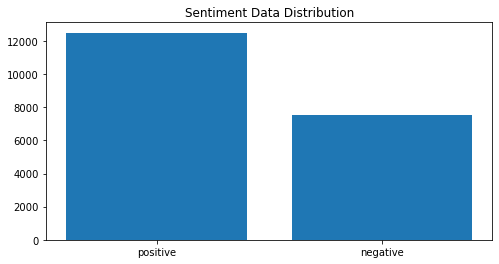

In [16]:
#Graphing
val_count = sample.sentiment.value_counts()
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
 # Splits Dataset into Training and Testing set
train_size = 0.8
train_data, test_data = train_test_split(sample, test_size=1-train_size, random_state=42, shuffle=True)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 16000
Test Data size 4000


## Model

In [19]:
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout
from sklearn.preprocessing import LabelEncoder

In [20]:
lb=LabelEncoder()
sample['sentiment'] = lb.fit_transform(sample['sentiment'])

In [21]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(sample['body'].values)
X = tokenizer.texts_to_sequences(sample['body'].values)
X = pad_sequences(X, maxlen = 300)

In [22]:
X.shape

(20000, 300)

In [23]:
y = sample['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [24]:
model = Sequential()
model.add(Embedding(X.shape[0], 64, input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'BinaryCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['accuracy'])
print(model.summary())

2022-04-17 22:11:37.441401: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 64)           1280000   
                                                                 
 dropout (Dropout)           (None, 300, 64)           0         
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
batch_size=1024
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
16/16 [==============================] - 171s 11s/step - loss: 0.6639 - accuracy: 0.6501
Epoch 2/5
16/16 [==============================] - 169s 11s/step - loss: 0.5522 - accuracy: 0.7132
Epoch 3/5
16/16 [==============================] - 174s 11s/step - loss: 0.5375 - accuracy: 0.7220
Epoch 4/5
16/16 [==============================] - 144s 9s/step - loss: 0.4937 - accuracy: 0.7543
Epoch 5/5
16/16 [==============================] - 163s 10s/step - loss: 0.4931 - accuracy: 0.7546


In [26]:
model.evaluate(X_test,y_test)

125/125 [==============================] - 7s 49ms/step - loss: 0.5250 - accuracy: 0.7280


[0.5249891877174377, 0.7279999852180481]

## Plot Sentiment Over Time

In [27]:
def Average(lst):
    if len(lst) == 0:
        return 0
    else:
        return sum(lst) / len(lst)
    

In [28]:
def avg_over_time(df):
    df_length = len(df)
    avg_sentiment_dict = {}
    for year in ['2019', '2020', '2021', '2022']:
        for month in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
            for day in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20','21', '22', '23', '24', '25', '26', '27', '28']:
                index_list = []
                for a in range(df_length):
                    date = df.at[a, 'created_utc']
                    date = date.replace('-', ' ')
                    date = date.split()
                    if date[0] == year and date[1] == month and date[2] == day:
                        index_list.append(a)
                average = 0
                sentiment_list = []
                for index in index_list:
                    sentiment = df.at[index, 'sentiment']
                    sentiment_list.append(sentiment)
                average = Average(sentiment_list)
                avg_sentiment_dict[(year, month, day)] = average
    key_list = []
    for key, value in avg_sentiment_dict.items():
        if value == 0:
            key_list.append(key)
    for key in key_list:
        del avg_sentiment_dict[key]
    return avg_sentiment_dict

In [29]:
def month_over_time(df):
    df_length = len(df)
    avg_sentiment_dict = {}
    for year in ['2019', '2020', '2021', '2022']:
        for month in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
            index_list = []
            for a in range(df_length):
                date = df.at[a, 'created_utc']
                date = date.replace('-', ' ')
                date = date.split()
                if date[0] == year and date[1] == month:
                    index_list.append(a)
            average = 0
            sentiment_list = []
            for index in index_list:
                sentiment = df.at[index, 'sentiment']
                sentiment_list.append(sentiment)
            average = Average(sentiment_list)
            avg_sentiment_dict[(year, month)] = average
    key_list = []
    for key, value in avg_sentiment_dict.items():
        if value == 0:
            key_list.append(key)
    for key in key_list:
        del avg_sentiment_dict[key]
    return avg_sentiment_dict

In [30]:
def date(utc):
    for date in utc:
        time = date.split()[0]
    return time

### Anxiety

In [218]:
anxiety = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/2019-2022_anxiety_subreddit.csv')
anxiety = anxiety.dropna(axis = 0, how = 'any')
anxiety = anxiety.reset_index()
anxiety

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
0,0,0,2,c84ete,Had to call in sick today bc of panic attacks ...,Anxiety,2019-07-02 03:49:50+00:00
1,1,1,3,c84e8w,Hi I need advice :))) so I started a new job 3...,Anxiety,2019-07-02 03:48:11+00:00
2,2,2,6,c84a6s,Idk how to describe it. It’s like a jolt feeli...,Anxiety,2019-07-02 03:35:51+00:00
3,3,3,7,c84494,I wouldn’t say my social anxiety is awful but ...,Anxiety,2019-07-02 03:18:57+00:00
4,4,4,8,c841r4,"Before I start, I just want to say that I do t...",Anxiety,2019-07-02 03:11:44+00:00
...,...,...,...,...,...,...,...
101296,105120,105120,189979,tpibfo,I am actually the exact opposite of someone wi...,Anxiety,2022-03-27 11:48:56+00:00
101297,105121,105121,189982,tpi51r,I’m 24f just for context and have history of G...,Anxiety,2022-03-27 11:36:41+00:00
101298,105122,105122,189983,tpi3y5,i can’t remember the last time i didn’t get th...,Anxiety,2022-03-27 11:34:32+00:00
101299,105123,105123,189985,tphtpr,hey! does anyone here experience panic attacks...,Anxiety,2022-03-27 11:14:46+00:00


In [219]:
anxiety.created_utc = anxiety.created_utc.apply(lambda x: date(x))
anxiety = anxiety.sort_values(['created_utc'])
anxiety

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
57,60,60,114,c7rkjo,I've been practicing this for a while but it's...,Anxiety,2019-07-01
59,62,62,118,c7r9zn,My anxiety becomes very bad around dating rela...,Anxiety,2019-07-01
58,61,61,117,c7rbuv,"It’s weird, I’m a 21 year old college student ...",Anxiety,2019-07-01
56,59,59,111,c7s3fg,Almost every night around 6 or 7 until I fall ...,Anxiety,2019-07-01
55,58,58,109,c7s79p,"- be me (recent adult, still in college) \n- l...",Anxiety,2019-07-01
...,...,...,...,...,...,...,...
101177,104990,104990,189810,tpygbs,I am putting this here because I don't know wh...,Anxiety,2022-03-28
101176,104988,104988,189808,tpym38,"my head doesnt hurt, it just feels weird, like...",Anxiety,2022-03-28
101175,104987,104987,189807,tpymi6,"Just curious if anyone has experienced this, I...",Anxiety,2022-03-28
101173,104985,104985,189805,tpyq3u,like sometimes i’ll have periods of good menta...,Anxiety,2022-03-28


In [220]:
anxiety.body = anxiety.body.apply(lambda x: preprocessing(x))

In [221]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(anxiety_first['body'].values)
anxiety_vec = tokenizer.texts_to_sequences(anxiety_first['body'].values)
anxiety_vec = pad_sequences(anxiety_vec, maxlen = 300)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Users/justinchen/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py", line 4739, in <genexpr>
    ta.write(time, out) for ta, out in zip(output_ta_t, flat_output))  File "/Users/justinchen/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


In [134]:
anxiety_first = anxiety.head(50000)

In [222]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(anxiety_first['body'].values)
anxiety_vec = tokenizer.texts_to_sequences(anxiety_first['body'].values)
anxiety_vec = pad_sequences(anxiety_vec, maxlen = 300)

In [223]:
sentiment = model(anxiety_vec)

In [224]:
anxiety_second = anxiety.tail(51301)

In [225]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(anxiety_second['body'].values)
anxiety_vec = tokenizer.texts_to_sequences(anxiety_second['body'].values)
anxiety_vec = pad_sequences(anxiety_vec, maxlen = 300)

In [226]:
sentiment_2 = model(anxiety_vec)

In [227]:
sentiment = tf.concat([sentiment, sentiment_2], 0)

In [228]:
anxiety.insert(4, "sentiment", sentiment)

In [231]:
anxiety

,level_0,Unnamed: 0,index,id,sentiment,body,subreddit,created_utc
57,60,60,114,c7rkjo,0.608681,practicing hard need help part best reader wri...,Anxiety,2019-07-01
59,62,62,118,c7r9zn,0.809320,anxiety becomes bad around dating relationship...,Anxiety,2019-07-01
58,61,61,117,c7rbuv,0.643504,weird year old college student really know mak...,Anxiety,2019-07-01
56,59,59,111,c7s3fg,0.482979,almost every night around 7 fall asleep develo...,Anxiety,2019-07-01
55,58,58,109,c7s79p,0.760147,recent adult still college lived lonely life l...,Anxiety,2019-07-01
...,...,...,...,...,...,...,...,...
101177,104990,104990,189810,tpygbs,0.966932,putting know else put right thanksgiving last ...,Anxiety,2022-03-28
101176,104988,104988,189808,tpym38,0.439632,head doesnt hurt feels weird like shaky tingly...,Anxiety,2022-03-28
101175,104987,104987,189807,tpymi6,0.869061,curious anyone experienced separate occasions ...,Anxiety,2022-03-28
101173,104985,104985,189805,tpyq3u,0.123135,like sometimes periods good mental health like...,Anxiety,2022-03-28


In [427]:
def march_2020(df):
    new_df = pd.DataFrame()
    df_length = len(df)
    avg_sentiment_dict = {}
    for year in ['2020']:
        for month in ['03']:
            for day in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20','21', '22', '23', '24', '25', '26', '27', '28', '29', '30']:
                index_list = []
                for a in range(df_length):
                    date = df.at[a, 'created_utc']
                    date = date.replace('-', ' ')
                    date = date.split()
                    if date[0] == year and date[1] == month and date[2] == day:
                        index_list.append(a)
                average = 0
                sentiment_list = []
                for index in index_list:
                    sentiment = df.at[index, 'sentiment']
                    sentiment_list.append(sentiment)
                average = Average(sentiment_list)
                avg_sentiment_dict[(year, month, day)] = average
    key_list = []
    for key, value in avg_sentiment_dict.items():
        if value == 0:
            key_list.append(key)
    for key in key_list:
        del avg_sentiment_dict[key]
    new_df['date'] = avg_sentiment_dict.keys()
    new_df['sentiment'] = avg_sentiment_dict.values()
    return new_df

In [529]:
march_anxiety = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/2020_3 anxiety_subreddit.csv')
march_anxiety = march_anxiety.dropna(axis = 0, how = 'any')
march_anxiety = march_anxiety.reset_index()
march_anxiety

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
0,0,0,0,fc6ywy,25/F I was on medication for anxiety/OCD/ de...,Anxiety,2020-03-02 04:58:24+00:00
1,1,1,1,fc6yt4,"\n\n(sorry for the long post, feel free to sk...",Anxiety,2020-03-02 04:58:13+00:00
2,2,2,4,fc6j94,"I've been suffering with anxiety, depression a...",Anxiety,2020-03-02 04:20:37+00:00
3,3,3,6,fc6ba6,I get really nervous in the days and hours lea...,Anxiety,2020-03-02 04:02:30+00:00
4,4,4,13,fc5wfl,I feel threatened by being around people who a...,Anxiety,2020-03-02 03:29:25+00:00
...,...,...,...,...,...,...,...
2625,2734,2734,5216,frldcp,Was sitting playing cards with my fiancée toni...,Anxiety,2020-03-30 06:01:57+00:00
2626,2735,2735,5217,frl90l,My anxiety is normally sky high when I wake up...,Anxiety,2020-03-30 05:51:36+00:00
2627,2736,2736,5218,frl2xb,I’m in a really bad spot right now. Every seco...,Anxiety,2020-03-30 05:36:57+00:00
2628,2737,2737,5219,frl1ww,Please no hate! I have ocd and depression. PTS...,Anxiety,2020-03-30 05:34:39+00:00


In [530]:
march_anxiety.created_utc = march_anxiety.created_utc.apply(lambda x: date(x))
march_anxiety = march_anxiety.sort_values(['created_utc'])
march_anxiety

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
71,73,73,129,fbu3w3,I met a guy on the internet and we are going o...,Anxiety,2020-03-01
73,75,75,133,fbu0mf,A few days ago something happened at work that...,Anxiety,2020-03-01
72,74,74,131,fbu19w,The private GP service I just went to offers n...,Anxiety,2020-03-01
70,71,71,126,fbum2m,"Hi guys, this may sound odd, but I'm looking t...",Anxiety,2020-03-01
69,70,70,125,fbuo64,"So last night, I was walking in the city alone...",Anxiety,2020-03-01
...,...,...,...,...,...,...,...
2542,2647,2647,5027,fs5iax,"So it started like 3 days ago, when it's about...",Anxiety,2020-03-31
2541,2646,2646,5026,fs5op0,So I've dealt with social anxiety/OCD for most...,Anxiety,2020-03-31
2540,2645,2645,5025,fs5r3k,"I don’t know why I’m like this, maybe it’s bei...",Anxiety,2020-03-31
2538,2643,2643,5023,fs5u8z,I have a feeling that title will catch the att...,Anxiety,2020-03-31


In [531]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(march_anxiety['body'].values)
anxiety_vec = tokenizer.texts_to_sequences(march_anxiety['body'].values)
anxiety_vec = pad_sequences(anxiety_vec, maxlen = 300)

In [532]:
sentiment = model(anxiety_vec)

In [533]:
march_anxiety.insert(4, "sentiment", sentiment)

In [534]:
anxiety_march = march_2020(march_anxiety)
anxiety_march['moving average sentiment'] = anxiety_march['sentiment'].rolling(3).mean()
anxiety_march

,date,sentiment,moving average sentiment
0,"(2020, 03, 01)",0.596885,NaN
1,"(2020, 03, 02)",0.602840,NaN
2,"(2020, 03, 03)",0.587149,0.595625
3,"(2020, 03, 04)",0.548727,0.579572
4,"(2020, 03, 05)",0.597517,0.577798
5,"(2020, 03, 06)",0.643938,0.596727
6,"(2020, 03, 07)",0.599328,0.613595
7,"(2020, 03, 08)",0.584228,0.609165
8,"(2020, 03, 09)",0.593636,0.592398
9,"(2020, 03, 10)",0.605177,0.594347


In [535]:
def df_str_list(df):
    str_list = []
    for date in df['date']:
        date_str = ''
        for number in date:
            date_str += number + '/'
        date_str = date_str[:-1]
        str_list.append(date_str)
    return str_list

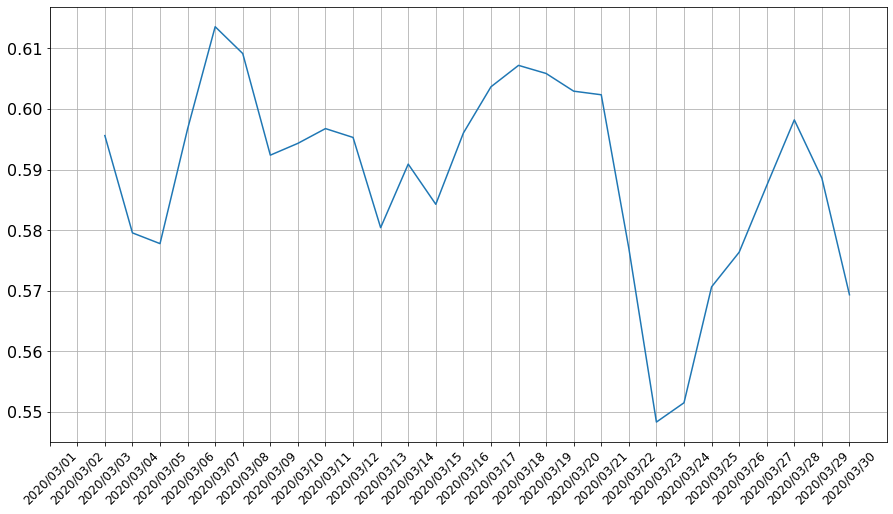

In [536]:
from matplotlib.axis import Axis
fig = plt.figure(1,figsize=(15,8))
ax = fig.add_subplot()
anxiety_list = df_str_list(anxiety_march)
anxiety_x = anxiety_list
anxiety_y = anxiety_march['moving average sentiment']
ax.plot(anxiety_x,anxiety_y)
ax.set_xticks(anxiety_x[::])
ax.set_xticklabels(anxiety_x[::], rotation=45, fontsize = 12)
ax.tick_params(axis='y', labelsize=16)
plt.grid()
plt.show()

In [ ]:
anxiety_march = march_2020(anxiety)
anxiety_march['moving average sentiment'] = anxiety_march['sentiment'].rolling(3).mean()
anxiety_march

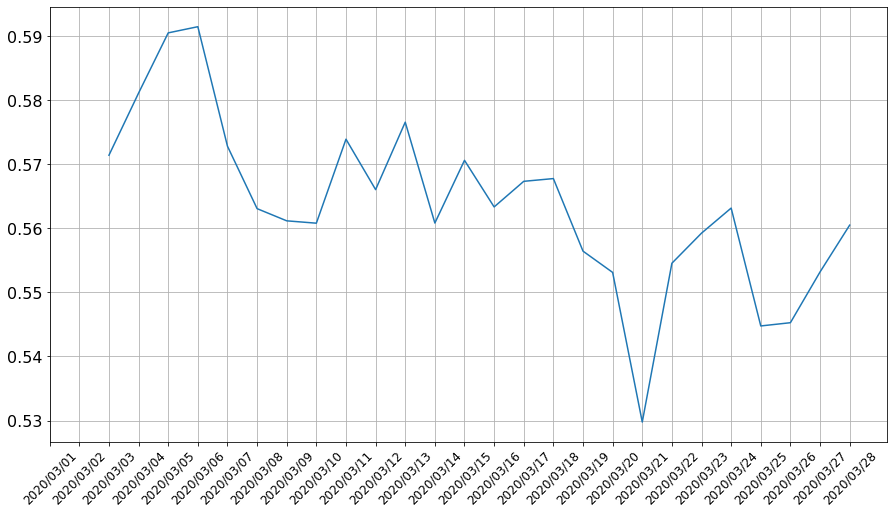

In [393]:
from matplotlib.axis import Axis
fig = plt.figure(1,figsize=(15,8))
ax = fig.add_subplot()
anxiety_list = df_str_list(anxiety_march)
anxiety_x = anxiety_list
anxiety_y = anxiety_march['moving average sentiment']
ax.plot(anxiety_x,anxiety_y)
ax.set_xticks(anxiety_x[::])
ax.set_xticklabels(anxiety_x[::], rotation=45, fontsize = 12)
ax.tick_params(axis='y', labelsize=16)
plt.grid()
plt.show()

In [ ]:
anxiety_dict_day = avg_over_time(anxiety)
anxiety_dict_day

### Depression

In [537]:
depression_earliest = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/2019_7-8 depression_subreddit.csv')
depression_early = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/2019-2020_depression_subreddit.csv')
depression_mid = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/2021_1-2_depression_subreddit.csv')
depression_late = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/2021_3-2022_3_depression_subreddit.csv')
depression = depression_earliest.append([depression_early, depression_mid, depression_late])
depression = depression.dropna(axis = 0, how = 'any')
depression = depression.reset_index()
depression

/var/folders/q6/mkn146812pz0n3cx40bgg__40000gn/T/ipykernel_29132/971079353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  depression = depression_earliest.append([depression_early, depression_mid, depression_late])


,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
0,0,0,1,c84hx5,What the hell is wrong with me? I don’t even k...,depression,2019-07-02 03:59:22+00:00
1,1,1,3,c84hrc,"I’m too much of a pussy to end it, and I’m too...",depression,2019-07-02 03:58:51+00:00
2,2,2,6,c84foc,"I have a lot of shit I need to get out, I have...",depression,2019-07-02 03:52:18+00:00
3,3,3,11,c84cnm,I was raised in an abusive household and pulle...,depression,2019-07-02 03:43:32+00:00
4,4,4,13,c84bl5,I’m a failure.. I’m 18 and I finish school at ...,depression,2019-07-02 03:40:16+00:00
...,...,...,...,...,...,...,...
53301,18807,18807,38501,tpontk,"I am doing fine, ofcourse i don't have an easy...",depression,2022-03-27 17:26:34+00:00
53302,18808,18808,38502,tpokkx,first of all sorry for the grammar english is ...,depression,2022-03-27 17:22:01+00:00
53303,18809,18809,38503,tpok5s,I have been fighting this for a while now and ...,depression,2022-03-27 17:21:25+00:00
53304,18810,18810,38506,tpofqt,"Yes, I've attempted suicide and failed. Recent...",depression,2022-03-27 17:15:27+00:00


In [538]:
depression.created_utc = depression.created_utc.apply(lambda x: date(x))
depression = depression.sort_values(['created_utc'])
depression

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
54,55,55,126,c81udd,"I’m in depression hell right now, and I have d...",depression,2019-07-01
60,62,62,147,c81e4d,"Well here I am again, I was getting excited an...",depression,2019-07-01
59,61,61,146,c81f6v,I’m angry and mean. I push everyone away and m...,depression,2019-07-01
58,59,59,140,c81ix2,"It’s a long story, but basically I’m gonna hav...",depression,2019-07-01
57,58,58,137,c81lfw,In the last 2 months I have lost a huge chunk ...,depression,2019-07-01
...,...,...,...,...,...,...,...
53172,18678,18678,38286,tpxh1t,Is it bad to ask a partner to help you get out...,depression,2022-03-28
53173,18679,18679,38287,tpxgta,So I let go of my boyfriend (27M) because he s...,depression,2022-03-28
53174,18680,18680,38288,tpxgs6,I'm in high school and I'm new to the sub. I h...,depression,2022-03-28
53166,18672,18672,38276,tpxpn1,\n\nim therteen and lately i just been feelin...,depression,2022-03-28


In [539]:
depression.body = depression.body.apply(lambda x: preprocessing(x))

In [540]:
depression_first = depression.head(25000)

In [541]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(depression_first['body'].values)
depression_vec = tokenizer.texts_to_sequences(depression_first['body'].values)
depression_vec = pad_sequences(depression_vec, maxlen = 300)

In [542]:
sentiment = model(depression_vec)

In [543]:
depression_second = depression.tail(28306)

In [544]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(depression_second['body'].values)
depression_vec = tokenizer.texts_to_sequences(depression_second['body'].values)
depression_vec = pad_sequences(depression_vec, maxlen = 300)

In [545]:
sentiment_2 = model(depression_vec)

In [546]:
sentiment = tf.concat([sentiment, sentiment_2], 0)

In [547]:
depression.insert(4, "sentiment", sentiment)

In [554]:
march_depression = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/2020_3 depression_subreddit.csv')
march_depression = march_depression.dropna(axis = 0, how = 'any')
march_depression = march_depression.reset_index()
march_depression

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
0,0,0,2,fc6xoz,My i guess soon to be ex wife told me today th...,depression,2020-03-02 04:55:28+00:00
1,1,1,3,fc6wx2,I‘m 22 and in a few months will be graduating ...,depression,2020-03-02 04:53:33+00:00
2,2,2,4,fc6wci,There’s just a big fat void in me. Life doesn’...,depression,2020-03-02 04:52:11+00:00
3,3,3,7,fc6t5h,Pointless shit. Pointless. Pointless. Pointles...,depression,2020-03-02 04:44:19+00:00
4,4,4,8,fc6smg,I don’t know if I have depression or not. I ha...,depression,2020-03-02 04:43:15+00:00
...,...,...,...,...,...,...,...
5751,5907,5907,13009,frk9nh,Last night he promised me when I came over tod...,depression,2020-03-30 04:31:59+00:00
5752,5908,5908,13010,frk78n,"I thought I beat my depression. Well, got as c...",depression,2020-03-30 04:26:54+00:00
5753,5909,5909,13011,frk4n2,"Has anyone read this?\n\nHe's a mentalist, ill...",depression,2020-03-30 04:21:10+00:00
5754,5910,5910,13013,frk2ss,Anyone get that? Feel that way?,depression,2020-03-30 04:17:00+00:00


In [555]:
march_depression.created_utc = march_depression.created_utc.apply(lambda x: date(x))
march_depression = march_depression.sort_values(['created_utc'])
march_depression

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
162,163,163,346,fbwt1b,January and February were terrible for me. I f...,depression,2020-03-01
154,155,155,337,fbx9nl,"I do something, I should feel good about it. I...",depression,2020-03-01
155,156,156,338,fbx7de,This last month has probably been one of the w...,depression,2020-03-01
156,157,157,339,fbx54x,Edit: *my* past*\n\nWhen I think back one or t...,depression,2020-03-01
157,158,158,340,fbx48q,I don’t know if you’re losing feelings or if i...,depression,2020-03-01
...,...,...,...,...,...,...,...
5578,5729,5729,12585,fs45uj,I have been battling depression and loneliness...,depression,2020-03-31
5579,5730,5730,12586,fs437a,We're tired of pain. Why does nobody help us t...,depression,2020-03-31
5580,5731,5731,12590,fs41fs,I’ve been basically stuck in my house from pre...,depression,2020-03-31
5582,5733,5733,12592,fs3zha,"My depression gives me horrible anxiety, and i...",depression,2020-03-31


In [556]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(march_depression['body'].values)
depression_vec = tokenizer.texts_to_sequences(march_depression['body'].values)
depression_vec = pad_sequences(depression_vec, maxlen = 300)

In [558]:
sentiment = model(depression_vec)

In [559]:
march_depression.insert(4, "sentiment", sentiment)

In [647]:
depression_march = march_2020(march_depression)
depression_march['moving average sentiment'] = depression_march['sentiment'].rolling(1).mean()
depression_march

,date,sentiment,moving average sentiment
0,"(2020, 03, 01)",0.572614,0.572614
1,"(2020, 03, 02)",0.567034,0.567034
2,"(2020, 03, 03)",0.578310,0.578310
3,"(2020, 03, 04)",0.568428,0.568428
4,"(2020, 03, 05)",0.545725,0.545725
5,"(2020, 03, 06)",0.560184,0.560184
6,"(2020, 03, 07)",0.568747,0.568747
7,"(2020, 03, 08)",0.594943,0.594943
8,"(2020, 03, 09)",0.586453,0.586453
9,"(2020, 03, 10)",0.583195,0.583195


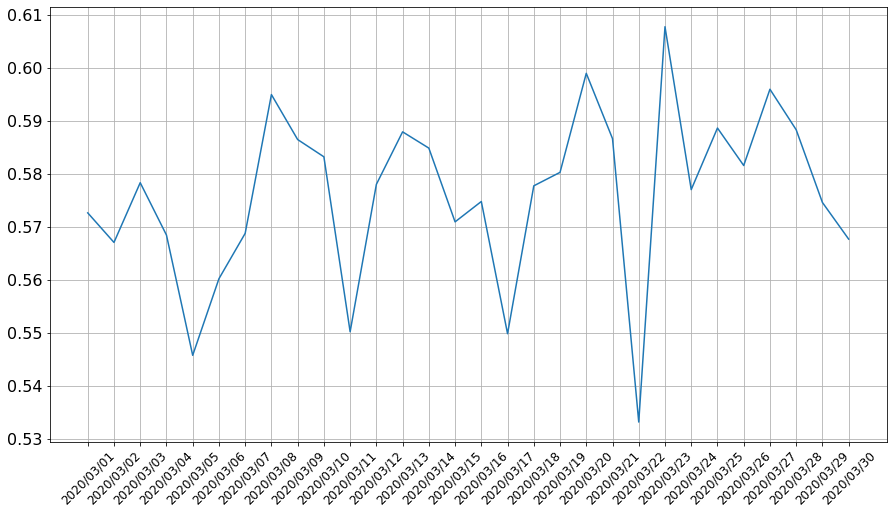

In [648]:
depression_list = df_str_list(depression_march)

from matplotlib.axis import Axis
fig = plt.figure(1,figsize=(15,8))
ax = fig.add_subplot()
depression_list = str_list(depression_march)
depression_x = depression_list
depression_y = depression_march['moving average sentiment']
ax.plot(depression_x,depression_y)
ax.set_xticks(depression_x[::])
ax.set_xticklabels(depression_x[::], rotation=45, fontsize = 12)
ax.tick_params(axis='y', labelsize=16)
plt.grid()
plt.show()

In [652]:
depression_march = march_2020(depression)
depression_march['moving average sentiment'] = depression_march['sentiment'].rolling(3).mean()
depression_march

,date,sentiment,moving average sentiment
0,"(2020, 03, 01)",0.502364,NaN
1,"(2020, 03, 02)",0.575819,NaN
2,"(2020, 03, 03)",0.531217,0.536466
3,"(2020, 03, 04)",0.541630,0.549555
4,"(2020, 03, 05)",0.555400,0.542749
5,"(2020, 03, 06)",0.573629,0.556886
6,"(2020, 03, 07)",0.547619,0.558882
7,"(2020, 03, 08)",0.588544,0.569930
8,"(2020, 03, 09)",0.571211,0.569124
9,"(2020, 03, 10)",0.571296,0.577017


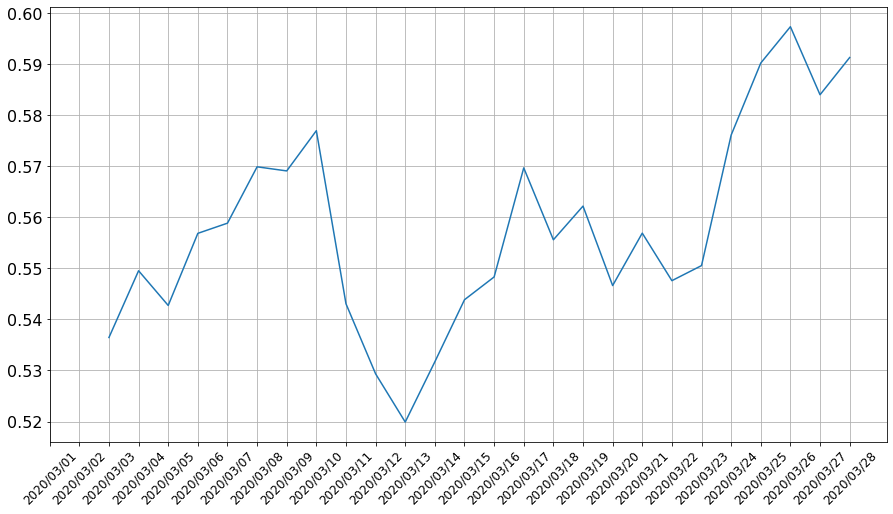

In [653]:
depression_list = df_str_list(depression_march)

from matplotlib.axis import Axis
fig = plt.figure(1,figsize=(15,8))
ax = fig.add_subplot()
depression_list = str_list(depression_march)
depression_x = depression_list
depression_y = depression_march['moving average sentiment']
ax.plot(depression_x,depression_y)
ax.set_xticks(depression_x[::])
ax.set_xticklabels(depression_x[::], rotation=45, fontsize = 12)
ax.tick_params(axis='y', labelsize=16)
plt.grid()
plt.show()

### MentalHealth

In [294]:
mentalhealth = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/2019-2022_mentalhealth_subreddit.csv')
mentalhealth = mentalhealth.dropna(axis = 0, how = 'any')
mentalhealth = mentalhealth.reset_index()
mentalhealth.head()

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
0,0,0,3,e4tpxl,"Hi! I didn't know where else to put this, as I...",mentalhealth,2019-12-02 04:34:55+00:00
1,1,1,6,e4tgro,Do you ever look into the mirror and realize t...,mentalhealth,2019-12-02 04:13:06+00:00
2,2,2,8,e4te5y,"I dont really know where to post this, I figur...",mentalhealth,2019-12-02 04:07:06+00:00
3,4,4,10,e4t2g7,"I had an argument with my boyfriend, because I...",mentalhealth,2019-12-02 03:40:21+00:00
4,6,6,13,e4t0kc,Edit: my brother just got home. Tried talking ...,mentalhealth,2019-12-02 03:36:14+00:00


In [295]:
mentalhealth.created_utc = mentalhealth.created_utc.apply(lambda x: date(x))
mentalhealth = mentalhealth.sort_values(['created_utc'])
mentalhealth

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
79701,80827,80827,155121,c7qj7p,So my girlfriend told me about how she keeps s...,mentalhealth,2019-07-01
79689,80815,80815,155099,c7tnx1,I have had so many boyfriends who have we sexu...,mentalhealth,2019-07-01
79690,80816,80816,155100,c7tma4,"I’ve tried Calm, Meditation, and Headspace. Th...",mentalhealth,2019-07-01
79692,80818,80818,155104,c7sq0i,Hey everyone. I’m an 18 year old guy and I’m r...,mentalhealth,2019-07-01
79693,80819,80819,155105,c7sm7f,"Hello, as somebody who suspects that I have an...",mentalhealth,2019-07-01
...,...,...,...,...,...,...,...
79533,80655,80655,154827,tq0btp,My friend sometimes gets “stuck” in her car. S...,mentalhealth,2022-03-28
79534,80656,80656,154828,tq0b6g,My parents sheltered me all my life and becaus...,mentalhealth,2022-03-28
79535,80657,80657,154829,tq09zx,How do I process what’s happening and have som...,mentalhealth,2022-03-28
79537,80660,80660,154833,tq01z0,I don’t really know why I’m writing this or wh...,mentalhealth,2022-03-28


In [296]:
mentalhealth.body = mentalhealth.body.apply(lambda x: preprocessing(x))

In [297]:
mentalhealth_first = mentalhealth.head(40000)

In [298]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(mentalhealth_first['body'].values)
mentalhealth_vec = tokenizer.texts_to_sequences(mentalhealth_first['body'].values)
mentalhealth_vec = pad_sequences(mentalhealth_vec, maxlen = 300)

In [299]:
sentiment = model(mentalhealth_vec)

In [301]:
mentalhealth_second = mentalhealth.tail(48112)

In [302]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(mentalhealth_second['body'].values)
mentalhealth_vec = tokenizer.texts_to_sequences(mentalhealth_second['body'].values)
mentalhealth_vec = pad_sequences(mentalhealth_vec, maxlen = 300)

In [303]:
sentiment_2 = model(mentalhealth_vec)

In [304]:
sentiment = tf.concat([sentiment, sentiment_2], 0)

In [305]:
mentalhealth.insert(4, "sentiment", sentiment)

In [566]:
march_mentalhealth = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/2020_3 mentalhealth_subreddit.csv')
march_mentalhealth = march_mentalhealth.dropna(axis = 0, how = 'any')
march_mentalhealth = march_mentalhealth.reset_index()
march_mentalhealth

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
0,0,0,0,fc6vp6,Had a very bad nervous breakdown in November a...,mentalhealth,2020-03-02 04:50:32+00:00
1,1,1,1,fc6ti9,For a long time I've always daydreamed about b...,mentalhealth,2020-03-02 04:45:07+00:00
2,2,2,2,fc6r8u,And if I tell them I have a lot of serious sui...,mentalhealth,2020-03-02 04:39:49+00:00
3,3,3,4,fc6gsc,"Hey guys,\n\nI'm currently searching for anyon...",mentalhealth,2020-03-02 04:14:54+00:00
4,4,4,5,fc6bdm,I'm fairly new to reddit so please bear with m...,mentalhealth,2020-03-02 04:02:43+00:00
...,...,...,...,...,...,...,...
2219,2272,2272,4371,frkuhf,To give some insight I have been diagnosed thr...,mentalhealth,2020-03-30 05:17:34+00:00
2220,2273,2273,4375,frkk6q,I don’t feel close to as happy doing the thing...,mentalhealth,2020-03-30 04:55:11+00:00
2221,2274,2274,4380,frkbi3,[https://www.youtube.com/watch?v=F2zusWCVkik&t...,mentalhealth,2020-03-30 04:36:10+00:00
2222,2275,2275,4383,frk5u4,So to start off I was in a relationship for al...,mentalhealth,2020-03-30 04:23:51+00:00


In [567]:
march_mentalhealth.created_utc = march_mentalhealth.created_utc.apply(lambda x: date(x))
march_mentalhealth = march_mentalhealth.sort_values(['created_utc'])
march_mentalhealth

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
53,56,56,99,fbvhkw,"Just another day. You wake up, not really sure...",mentalhealth,2020-03-01
36,38,38,74,fbzfe7,Is any higher more effective?\nWhat's the best...,mentalhealth,2020-03-01
37,39,39,75,fbzal0,I had - and still have - no one. I'm not the d...,mentalhealth,2020-03-01
39,41,41,77,fbyynv,I think I’m going to regret how I treated my p...,mentalhealth,2020-03-01
40,42,42,80,fbxyez,"My husband had a rough childhood, which invol...",mentalhealth,2020-03-01
...,...,...,...,...,...,...,...
2140,2193,2193,4213,fs4okg,I'm honestly fucking miserably depressed. \nI ...,mentalhealth,2020-03-31
2141,2194,2194,4215,fs4h22,"I struggle with depression, anxiety and possib...",mentalhealth,2020-03-31
2142,2195,2195,4216,fs4438,I've hurt a lot of people in my time. For as l...,mentalhealth,2020-03-31
2144,2197,2197,4220,fs38ux,I've known I'm different all my life. People t...,mentalhealth,2020-03-31


In [568]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(march_mentalhealth['body'].values)
mentalhealth_vec = tokenizer.texts_to_sequences(march_mentalhealth['body'].values)
mentalhealth_vec = pad_sequences(mentalhealth_vec, maxlen = 300)

In [569]:
sentiment = model(mentalhealth_vec)

In [570]:
march_mentalhealth.insert(4, "sentiment", sentiment)

In [571]:
mentalhealth_march = march_2020(mentalhealth)
mentalhealth_march['moving average sentiment'] = mentalhealth_march['sentiment'].rolling(3).mean()
mentalhealth_march

KeyboardInterrupt: 

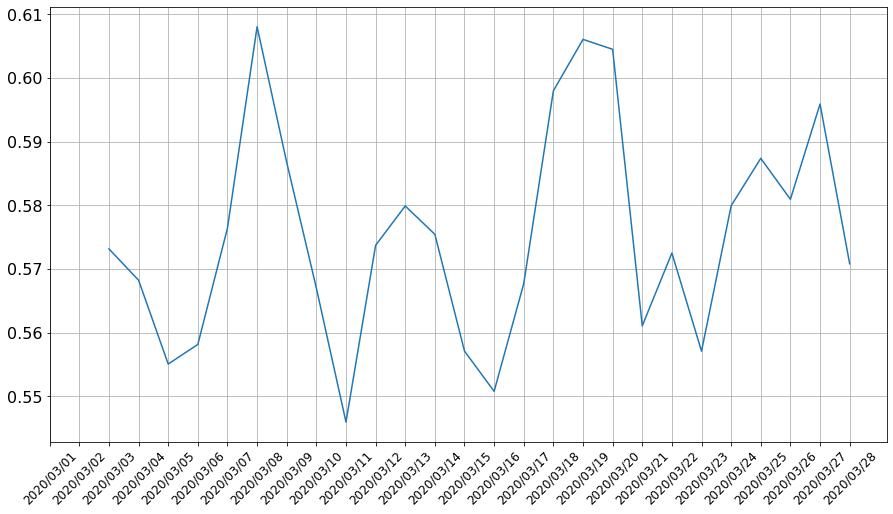

In [480]:
mentalhealth_list = df_str_list(mentalhealth_march)

from matplotlib.axis import Axis
fig = plt.figure(1,figsize=(15,8))
ax = fig.add_subplot()
mentalhealth_list = str_list(mentalhealth_march)
mentalhealth_x = mentalhealth_list
mentalhealth_y = mentalhealth_march['moving average sentiment']
ax.plot(mentalhealth_x,mentalhealth_y)
ax.set_xticks(mentalhealth_x[::])
ax.set_xticklabels(mentalhealth_x[::], rotation=45, fontsize = 12)
ax.tick_params(axis='y', labelsize=16)
plt.grid()
plt.show()

In [572]:
mentalhealth_march = march_2020(march_mentalhealth)
mentalhealth_march['moving average sentiment'] = mentalhealth_march['sentiment'].rolling(3).mean()
mentalhealth_march

,date,sentiment,moving average sentiment
0,"(2020, 03, 01)",0.602600,NaN
1,"(2020, 03, 02)",0.598133,NaN
2,"(2020, 03, 03)",0.608687,0.603140
3,"(2020, 03, 04)",0.621740,0.609520
4,"(2020, 03, 05)",0.627391,0.619273
5,"(2020, 03, 06)",0.564835,0.604655
6,"(2020, 03, 07)",0.576644,0.589623
7,"(2020, 03, 08)",0.616776,0.586085
8,"(2020, 03, 09)",0.610963,0.601461
9,"(2020, 03, 10)",0.629482,0.619074


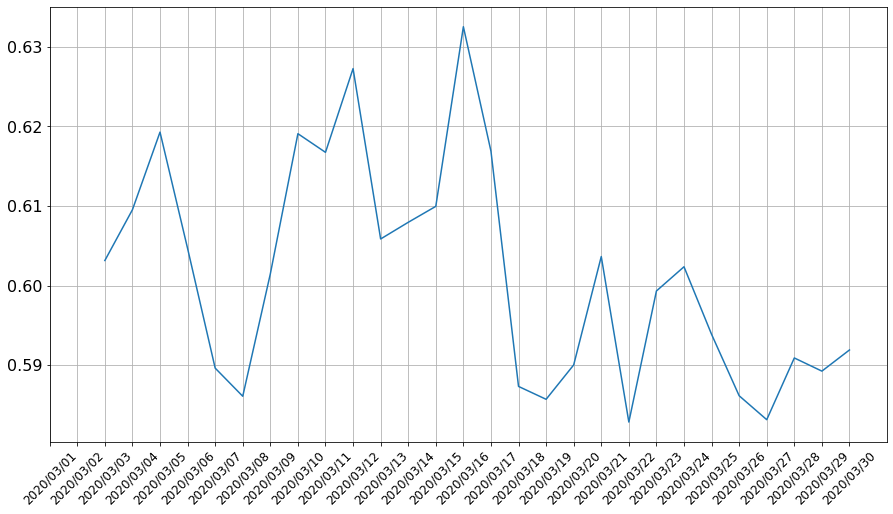

In [573]:
mentalhealth_list = df_str_list(mentalhealth_march)

from matplotlib.axis import Axis
fig = plt.figure(1,figsize=(15,8))
ax = fig.add_subplot()
mentalhealth_list = str_list(mentalhealth_march)
mentalhealth_x = mentalhealth_list
mentalhealth_y = mentalhealth_march['moving average sentiment']
ax.plot(mentalhealth_x,mentalhealth_y)
ax.set_xticks(mentalhealth_x[::])
ax.set_xticklabels(mentalhealth_x[::], rotation=45, fontsize = 12)
ax.tick_params(axis='y', labelsize=16)
plt.grid()
plt.show()

### SuicideWatch

In [685]:
suicidewatch_now = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/2019-2022_suicidewatch_subreddit.csv')
suicidewatch_2019 = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/2019_suicidewatch_subreddit.csv')
suicidewatch = suicidewatch_now.append([suicidewatch_2019])
suicidewatch = suicidewatch.drop(axis = 0, columns = 'id')
suicidewatch = suicidewatch.dropna(axis = 0, how = 'any')
suicidewatch = suicidewatch.reset_index()
suicidewatch

/var/folders/q6/mkn146812pz0n3cx40bgg__40000gn/T/ipykernel_29132/924843409.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  suicidewatch = suicidewatch_now.append([suicidewatch_2019])


,level_0,Unnamed: 0,index,body,subreddit,created_utc
0,0,0,4,Title.,SuicideWatch,2019-11-02 03:43:50+00:00
1,1,1,7,I just wanted someone to know. I’m sick of bei...,SuicideWatch,2019-11-02 03:36:45+00:00
2,2,2,9,I’ve been broken my whole life. It feels irret...,SuicideWatch,2019-11-02 03:34:39+00:00
3,3,3,11,"So, I don't mean to sound melodramatic, but I'...",SuicideWatch,2019-11-02 03:30:48+00:00
4,4,4,13,I fucking can’t take it anymore. Nobody ever w...,SuicideWatch,2019-11-02 03:16:35+00:00
...,...,...,...,...,...,...
76167,14554,14554,34091,I suffered a major depressive episode after a ...,SuicideWatch,2019-10-28 13:14:28+00:00
76168,14555,14555,34092,I just downloaded this app cause I wanted to k...,SuicideWatch,2019-10-28 13:00:47+00:00
76169,14556,14556,34096,I’m looking up bridges. I’m tired and depresse...,SuicideWatch,2019-10-28 12:53:50+00:00
76170,14557,14557,34097,"This isn't living, this isn't freedom, it's an...",SuicideWatch,2019-10-28 12:44:15+00:00


In [686]:
suicidewatch.created_utc = suicidewatch.created_utc.apply(lambda x: date(x))
suicidewatch = suicidewatch.sort_values(['created_utc'])
suicidewatch

,level_0,Unnamed: 0,index,body,subreddit,created_utc
62376,72,72,168,I feel jealous when I see someone striking up ...,SuicideWatch,2019-07-01
62363,58,58,142,I cant get out of this shithole for 2 years.I ...,SuicideWatch,2019-07-01
62362,57,57,141,It's been almost 18 years since my first suici...,SuicideWatch,2019-07-01
62361,56,56,138,they all say they do but when it comes down to...,SuicideWatch,2019-07-01
62360,55,55,137,No one cares. I can't be loved consistently. I...,SuicideWatch,2019-07-01
...,...,...,...,...,...,...
62214,65768,65768,152290,I grew up from a Latino family. I never really...,SuicideWatch,2022-03-28
62213,65767,65767,152288,I'm 18(F) and work a part-time office job. The...,SuicideWatch,2022-03-28
62212,65766,65766,152287,I don't want to live anymore. I've made plans ...,SuicideWatch,2022-03-28
62220,65774,65774,152299,Both pairs died unexpectedly and I know their ...,SuicideWatch,2022-03-28


In [687]:
suicidewatch.body = suicidewatch.body.apply(lambda x: preprocessing(x))

In [688]:
suicidewatch_first = suicidewatch.head(38000)

In [689]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(suicidewatch_first['body'].values)
suicidewatch_vec = tokenizer.texts_to_sequences(suicidewatch_first['body'].values)
suicidewatch_vec = pad_sequences(suicidewatch_vec, maxlen = 300)

In [690]:
sentiment = model(suicidewatch_vec)

In [691]:
suicidewatch_second = suicidewatch.tail(38172)

In [ ]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(suicidewatch_second['body'].values)
suicidewatch_vec = tokenizer.texts_to_sequences(suicidewatch_second['body'].values)
suicidewatch_vec = pad_sequences(suicidewatch_vec, maxlen = 300)

In [ ]:
sentiment_2 = model(suicidewatch_vec)

In [633]:
sentiment = tf.concat([sentiment, sentiment_2], 0)

In [634]:
suicidewatch.insert(4, "sentiment", sentiment)

In [617]:
march_suicidewatch = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/march2020_suicidewatch_subreddit.csv')
march_suicidewatch = march_suicidewatch.dropna(axis = 0, how = 'any')
march_suicidewatch = march_suicidewatch.reset_index()
march_suicidewatch

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
0,0,0,1,fc6s1u,For some reason it helps when I'm depressed to...,SuicideWatch,2020-03-02 04:41:49+00:00
1,1,1,3,fc6qmc,One thing I thought joining this site will hel...,SuicideWatch,2020-03-02 04:38:03+00:00
2,2,2,5,fc6ocr,I can feel my self slipping into a state of m...,SuicideWatch,2020-03-02 04:32:33+00:00
3,3,3,7,fc6g7p,"Life is being a bitch and a half, and I can’t ...",SuicideWatch,2020-03-02 04:13:42+00:00
4,4,4,8,fc6esd,I won't go long with this so here's the highli...,SuicideWatch,2020-03-02 04:10:27+00:00
...,...,...,...,...,...,...,...
3533,3709,3709,8409,frkbuh,Just like I do right now. All your posts as la...,SuicideWatch,2020-03-30 04:36:54+00:00
3534,3710,3710,8411,frk5il,Either for ideation or after an attempt,SuicideWatch,2020-03-30 04:23:11+00:00
3535,3711,3711,8415,frk2x4,I've been toying with suicide for along time n...,SuicideWatch,2020-03-30 04:17:16+00:00
3536,3712,3712,8417,frk07y,I could hypothetically get hired if I got my d...,SuicideWatch,2020-03-30 04:11:34+00:00


In [618]:
march_suicidewatch.created_utc = march_suicidewatch.created_utc.apply(lambda x: date(x))
march_suicidewatch = march_suicidewatch.sort_values(['created_utc'])
march_suicidewatch

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
94,99,99,228,fbv0d5,I work in a extremely remote camp in the high ...,SuicideWatch,2020-03-01
104,110,110,254,fbsqn8,Accidentally tried to kms last night. Didn’t t...,SuicideWatch,2020-03-01
103,109,109,253,fbtb1a,"That’s honestly how I feel. My parents, my bro...",SuicideWatch,2020-03-01
102,108,108,251,fbtcpc,Everybody else is winning. Except me. Obviousl...,SuicideWatch,2020-03-01
101,107,107,250,fbtcqy,"I'm the most boring, uninteresting person I kn...",SuicideWatch,2020-03-01
...,...,...,...,...,...,...,...
3433,3603,3603,8137,fs5c73,I really want to stop feeling any sort of emot...,SuicideWatch,2020-03-31
3432,3602,3602,8136,fs5coa,i just had one of the worst breakdowns since t...,SuicideWatch,2020-03-31
3431,3601,3601,8135,fs5etd,I feel like a tiger trapped in a cage. My fami...,SuicideWatch,2020-03-31
3442,3613,3613,8164,fs3vi2,"I made a countdown containing 10 days, the 10t...",SuicideWatch,2020-03-31


In [619]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(march_suicidewatch['body'].values)
suicidewatch_vec = tokenizer.texts_to_sequences(march_suicidewatch['body'].values)
suicidewatch_vec = pad_sequences(suicidewatch_vec, maxlen = 300)

In [620]:
sentiment = model(suicidewatch_vec)

In [621]:
march_suicidewatch.insert(4, "sentiment", sentiment)

In [639]:
suicidewatch_march = march_2020(march_suicidewatch)
suicidewatch_march['moving average sentiment'] = suicidewatch_march['sentiment'].rolling(3).mean()
suicidewatch_march

,date,sentiment,moving average sentiment
0,"(2020, 03, 01)",0.559652,NaN
1,"(2020, 03, 02)",0.555841,NaN
2,"(2020, 03, 03)",0.568151,0.561214
3,"(2020, 03, 04)",0.584807,0.569600
4,"(2020, 03, 05)",0.513595,0.555518
5,"(2020, 03, 06)",0.587967,0.562123
6,"(2020, 03, 07)",0.566264,0.555942
7,"(2020, 03, 08)",0.604252,0.586161
8,"(2020, 03, 09)",0.570075,0.580197
9,"(2020, 03, 10)",0.547157,0.573828


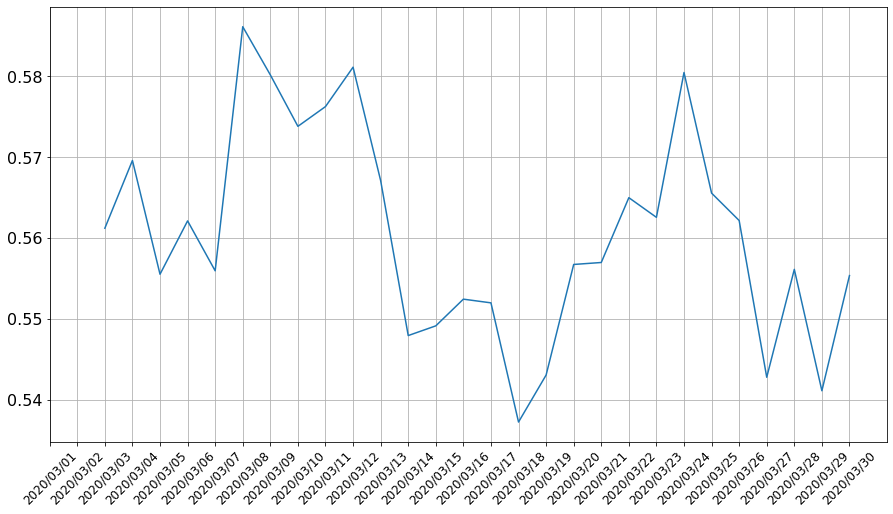

In [635]:
from matplotlib.axis import Axis
fig = plt.figure(1,figsize=(15,8))
ax = fig.add_subplot()
suicidewatch_list = df_str_list(suicidewatch_march)
suicidewatch_x = suicidewatch_list
suicidewatch_y = suicidewatch_march['moving average sentiment']
ax.plot(suicidewatch_x,suicidewatch_y)
ax.set_xticks(suicidewatch_x[::])
ax.set_xticklabels(suicidewatch_x[::], rotation=45, fontsize = 12)
ax.tick_params(axis='y', labelsize=16)
plt.grid()
plt.show()

In [636]:
suicidewatch_march = march_2020(suicidewatch)
suicidewatch_march['moving average sentiment'] = suicidewatch_march['sentiment'].rolling(3).mean()
suicidewatch_march

,date,sentiment,moving average sentiment
0,"(2020, 03, 01)",0.550220,NaN
1,"(2020, 03, 02)",0.584421,NaN
2,"(2020, 03, 03)",0.548654,0.561098
3,"(2020, 03, 04)",0.599923,0.577666
4,"(2020, 03, 05)",0.551943,0.566840
5,"(2020, 03, 06)",0.594736,0.582201
6,"(2020, 03, 07)",0.584258,0.576979
7,"(2020, 03, 08)",0.590301,0.589765
8,"(2020, 03, 09)",0.593127,0.589229
9,"(2020, 03, 10)",0.562418,0.581948


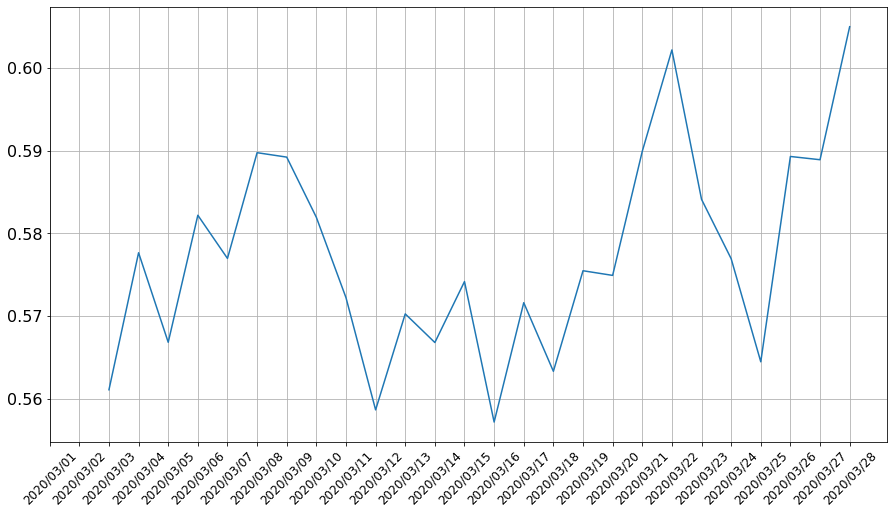

In [637]:
from matplotlib.axis import Axis
fig = plt.figure(1,figsize=(15,8))
ax = fig.add_subplot()
suicidewatch_list = df_str_list(suicidewatch_march)
suicidewatch_x = suicidewatch_list
suicidewatch_y = suicidewatch_march['moving average sentiment']
ax.plot(suicidewatch_x,suicidewatch_y)
ax.set_xticks(suicidewatch_x[::])
ax.set_xticklabels(suicidewatch_x[::], rotation=45, fontsize = 12)
ax.tick_params(axis='y', labelsize=16)
plt.grid()
plt.show()

## COVID19_support

In [179]:
COVID19_support = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/2019-2022_COVID19_support_subreddit.csv')
COVID19_support = COVID19_support.dropna(axis = 0, how = 'any')
COVID19_support = COVID19_support.reset_index()
COVID19_support

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
0,20,20,20,f4jkom,We want to make this a helpful productive envi...,COVID19_support,2020-02-16 01:48:59+00:00
1,29,29,30,fa43wn,I'm more scared now than ever. It's become cle...,COVID19_support,2020-02-27 01:21:34+00:00
2,31,31,32,f9zmnn,One way that I've learned to deal with pandemi...,COVID19_support,2020-02-26 20:27:30+00:00
3,39,39,40,faiucb,"I live in the US, in the south. \nSo nice & so...",COVID19_support,2020-02-27 20:59:28+00:00
4,41,41,45,fc5cfs,I live in Georgia ... how likely is it that an...,COVID19_support,2020-03-02 02:45:40+00:00
...,...,...,...,...,...,...,...
6224,6872,6872,11162,tk012j,Took my pre travel test on Sunday and was posi...,COVID19_support,2022-03-22 10:37:54+00:00
6225,6877,6877,11168,tkovag,I would love it if someone could help me with ...,COVID19_support,2022-03-23 07:55:17+00:00
6226,6878,6878,11171,tn3q85,So I got covid from a close family member. I s...,COVID19_support,2022-03-24 20:48:12+00:00
6227,6879,6879,11172,tmfmco,My Mom started to have symptoms this past Satu...,COVID19_support,2022-03-24 15:00:30+00:00


In [166]:
COVID19_support.created_utc = COVID19_support.created_utc.apply(lambda x: date(x))
COVID19_support = COVID19_support.sort_values(['created_utc'])
COVID19_support

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
0,20,20,20,f4jkom,We want to make this a helpful productive envi...,COVID19_support,2020-02-16
2,31,31,32,f9zmnn,One way that I've learned to deal with pandemi...,COVID19_support,2020-02-26
1,29,29,30,fa43wn,I'm more scared now than ever. It's become cle...,COVID19_support,2020-02-27
3,39,39,40,faiucb,"I live in the US, in the south. \nSo nice & so...",COVID19_support,2020-02-27
6,43,43,50,fc32w7,"Please give me hope, because I've lost it all....",COVID19_support,2020-03-01
...,...,...,...,...,...,...,...
6223,6871,6871,11161,tk5aou,Hi everyone. I have a friend who has just arri...,COVID19_support,2022-03-22
6225,6877,6877,11168,tkovag,I would love it if someone could help me with ...,COVID19_support,2022-03-23
6227,6879,6879,11172,tmfmco,My Mom started to have symptoms this past Satu...,COVID19_support,2022-03-24
6226,6878,6878,11171,tn3q85,So I got covid from a close family member. I s...,COVID19_support,2022-03-24


In [180]:
COVID19_support.body = COVID19_support.body.apply(lambda x: preprocessing(x))

In [181]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(COVID19_support['body'].values)
COVID19_support_vec = tokenizer.texts_to_sequences(COVID19_support['body'].values)
COVID19_support_vec = pad_sequences(COVID19_support_vec, maxlen = 300)

In [183]:
sentiment = model(COVID19_support_vec)
COVID19_support.insert(4, "sentiment", sentiment)

In [ ]:
COVID19_support_dict_day = avg_over_time(COVID19_support)
COVID19_support_dict_day

In [591]:
march_COVID19_support = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/march2020_COVID19_support_subreddit.csv')
march_COVID19_support = march_COVID19_support.dropna(axis = 0, how = 'any')
march_COVID19_support = march_COVID19_support.reset_index()
march_COVID19_support

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
0,0,0,1,fc5cfs,I live in Georgia ... how likely is it that an...,COVID19_support,2020-03-02 02:45:40+00:00
1,1,1,2,fc5bas,"Been posting a lot here lately. Sorry, just cu...",COVID19_support,2020-03-02 02:43:15+00:00
2,2,2,6,fc32w7,"Please give me hope, because I've lost it all....",COVID19_support,2020-03-01 23:53:43+00:00
3,3,3,7,fc24f7,"I'm not sure if this is true, but if it is it ...",COVID19_support,2020-03-01 22:46:03+00:00
4,4,4,10,fbx9kp,I have posted this previously on r/Coronavirus...,COVID19_support,2020-03-01 17:25:28+00:00
...,...,...,...,...,...,...,...
639,735,735,1182,frnffh,I don’t even live in the US and this is making...,COVID19_support,2020-03-30 09:09:19+00:00
640,736,736,1188,frlh5v,[https://www.theguardian.com/australia-news/20...,COVID19_support,2020-03-30 06:10:24+00:00
641,737,737,1189,frl73j,I haven't left my house for 3 weeks so I wasn'...,COVID19_support,2020-03-30 05:46:53+00:00
642,738,738,1192,frknyu,"I'm talking about packaged food, not produce. ...",COVID19_support,2020-03-30 05:03:35+00:00


In [592]:
march_COVID19_support.created_utc = march_COVID19_support.created_utc.apply(lambda x: date(x))
march_COVID19_support = march_COVID19_support.sort_values(['created_utc'])
march_COVID19_support

,level_0,Unnamed: 0,index,id,body,subreddit,created_utc
2,2,2,6,fc32w7,"Please give me hope, because I've lost it all....",COVID19_support,2020-03-01
3,3,3,7,fc24f7,"I'm not sure if this is true, but if it is it ...",COVID19_support,2020-03-01
4,4,4,10,fbx9kp,I have posted this previously on r/Coronavirus...,COVID19_support,2020-03-01
0,0,0,1,fc5cfs,I live in Georgia ... how likely is it that an...,COVID19_support,2020-03-02
16,19,19,36,fc8jue,This virus has me in a state of panic i cant t...,COVID19_support,2020-03-02
...,...,...,...,...,...,...,...
607,702,702,1132,fs4e7j,I’m a 30 yo mother of a 19mo little girl; I ha...,COVID19_support,2020-03-31
606,701,701,1131,fs4khv,Last Tuesday my wife got sent home from work a...,COVID19_support,2020-03-31
614,709,709,1140,fs2rx9,"So I work in a major supermarket in Australia,...",COVID19_support,2020-03-31
612,707,707,1138,fs2xa1,"I'm a 45 yo guy, mildly overweight and a forme...",COVID19_support,2020-03-31


In [593]:
tokenizer = Tokenizer(num_words=300, split=' ') 
tokenizer.fit_on_texts(march_COVID19_support['body'].values)
COVID19_support_vec = tokenizer.texts_to_sequences(march_COVID19_support['body'].values)
COVID19_support_vec = pad_sequences(COVID19_support_vec, maxlen = 300)

In [594]:
sentiment = model(COVID19_support_vec)

In [596]:
march_COVID19_support.insert(4, "sentiment", sentiment)

In [610]:
COVID19_support_march = march_2020(march_COVID19_support)
COVID19_support_march['moving average sentiment'] = COVID19_support_march['sentiment'].rolling(3).mean()
COVID19_support_march

,date,sentiment,moving average sentiment
0,"(2020, 03, 01)",0.473295,NaN
1,"(2020, 03, 02)",0.573249,NaN
2,"(2020, 03, 03)",0.605449,0.550664
3,"(2020, 03, 04)",0.615812,0.598170
4,"(2020, 03, 05)",0.734724,0.651995
5,"(2020, 03, 06)",0.499201,0.616579
6,"(2020, 03, 07)",0.442286,0.558737
7,"(2020, 03, 08)",0.597432,0.512973
8,"(2020, 03, 09)",0.645699,0.561806
9,"(2020, 03, 10)",0.492084,0.578405


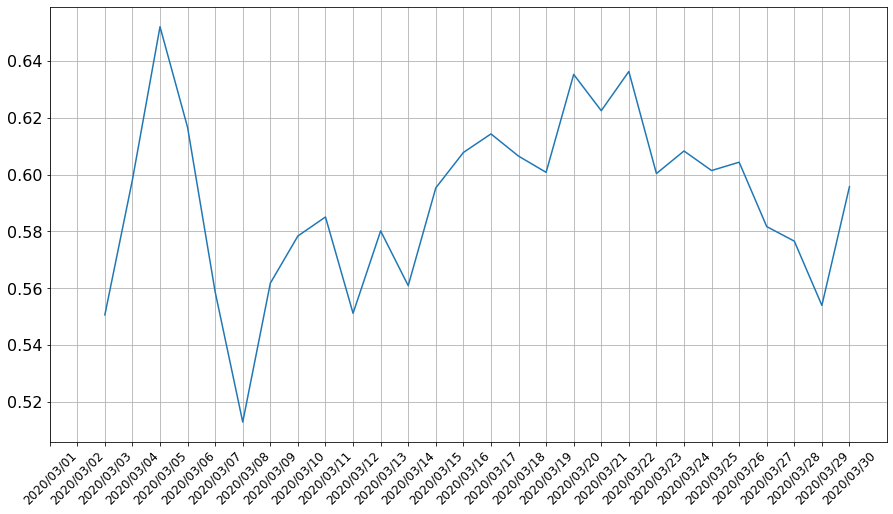

In [611]:
from matplotlib.axis import Axis
fig = plt.figure(1,figsize=(15,8))
ax = fig.add_subplot()
COVID19_support_list = df_str_list(COVID19_support_march)
COVID19_support_x = COVID19_support_list
COVID19_support_y = COVID19_support_march['moving average sentiment']
ax.plot(COVID19_support_x,COVID19_support_y)
ax.set_xticks(COVID19_support_x[::])
ax.set_xticklabels(COVID19_support_x[::], rotation=45, fontsize = 12)
ax.tick_params(axis='y', labelsize=16)
plt.grid()
plt.show()

In [613]:
COVID19_support_march = march_2020(COVID19_support)
COVID19_support_march['moving average sentiment'] = COVID19_support_march['sentiment'].rolling(3).mean()
COVID19_support_march

,date,sentiment,moving average sentiment
0,"(2020, 03, 01)",0.521933,NaN
1,"(2020, 03, 02)",0.602714,NaN
2,"(2020, 03, 03)",0.554058,0.559568
3,"(2020, 03, 04)",0.539886,0.565552
4,"(2020, 03, 05)",0.550896,0.548280
5,"(2020, 03, 06)",0.418986,0.503256
6,"(2020, 03, 07)",0.614820,0.528234
7,"(2020, 03, 08)",0.508450,0.514085
8,"(2020, 03, 09)",0.614767,0.579345
9,"(2020, 03, 10)",0.725956,0.616391


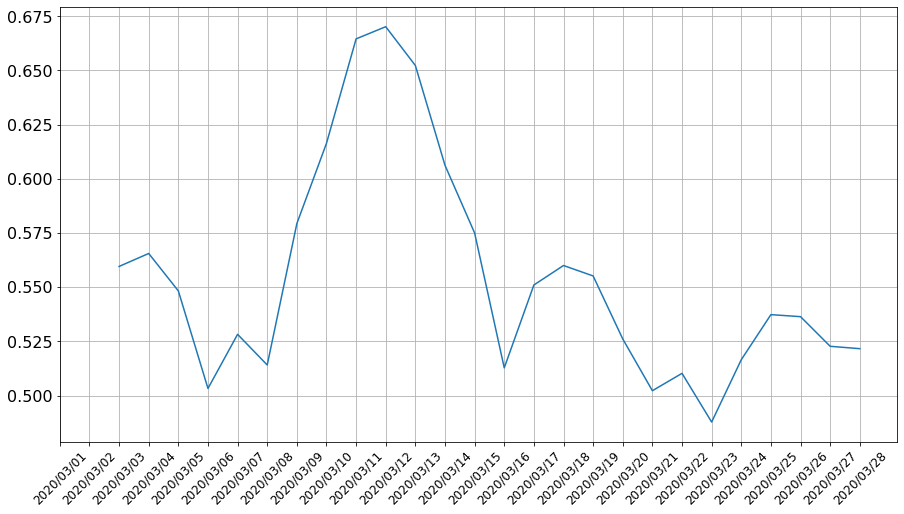

In [614]:
from matplotlib.axis import Axis
fig = plt.figure(1,figsize=(15,8))
ax = fig.add_subplot()
COVID19_support_list = df_str_list(COVID19_support_march)
COVID19_support_x = COVID19_support_list
COVID19_support_y = COVID19_support_march['moving average sentiment']
ax.plot(COVID19_support_x,COVID19_support_y)
ax.set_xticks(COVID19_support_x[::])
ax.set_xticklabels(COVID19_support_x[::], rotation=45, fontsize = 12)
ax.tick_params(axis='y', labelsize=16)
plt.grid()
plt.show()

In [46]:
def str_list(dict):
    str_list = []
    for date in dict.keys():
        date_str = ''
        for number in date:
            date_str += number + '/'
        date_str = date_str[:-1]
        str_list.append(date_str)
    return str_list

## March 2020

In [641]:
anxiety_list = str_list(anxiety_march)
depression_list = str_list(depression_march)
mentalhealth_list = str_list(mentalhealth_march)
suicidewatch_list = str_list(suicidewatch_march)
COVID19_support_list = str_list(COVID19_support_march)

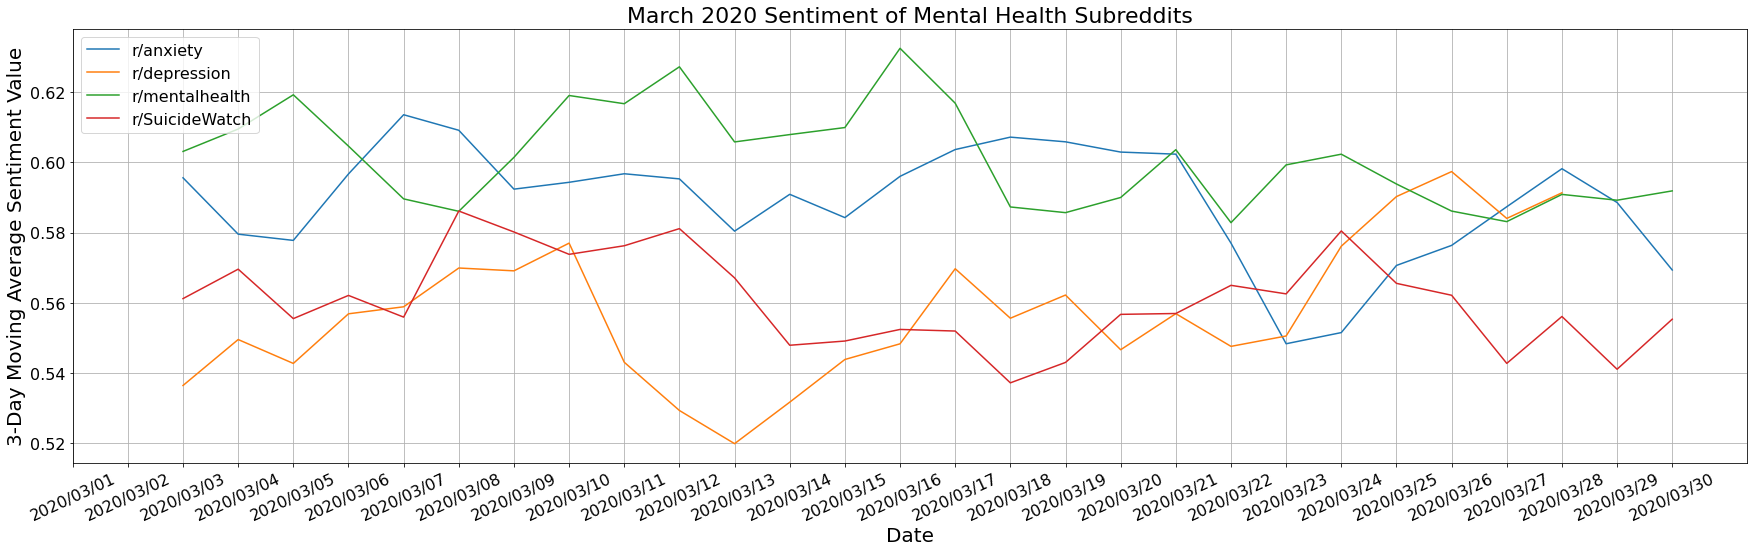

In [663]:
from matplotlib.axis import Axis
fig = plt.figure(1,figsize=(30,8))
ax = fig.add_subplot()

#Anxiety
anxiety_x = anxiety_list
anxiety_y = anxiety_march['moving average sentiment']
ax.plot(anxiety_x,anxiety_y)

#Depression
depression_x = depression_list
depression_y = depression_march['moving average sentiment']
ax.plot(depression_x,depression_y)

#MentalHealth
mentalhealth_x = mentalhealth_list 
mentalhealth_y = mentalhealth_march['moving average sentiment']
ax.plot(mentalhealth_x,mentalhealth_y)

#SuicideWatch
suicidewatch_x = suicidewatch_list 
suicidewatch_y = suicidewatch_march['moving average sentiment']
ax.plot(suicidewatch_x,suicidewatch_y)

# #COVID19_support
# COVID19_support_x = COVID19_support_list 
# COVID19_support_y = COVID19_support_march['moving average sentiment']
# ax.plot(COVID19_support_x ,COVID19_support_y)

ax.set_xticks(anxiety_list[::1])
ax.set_xticklabels(anxiety_list[::1], rotation=25, fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

plt.title('March 2020 Sentiment of Mental Health Subreddits', fontsize = 22)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('3-Day Moving Average Sentiment Value', fontsize = 20)

plt.legend(['r/anxiety', 'r/depression', 'r/mentalhealth', 'r/SuicideWatch', 'r/COVID19_support'], loc = 'upper left', fontsize = 16)
plt.grid()
plt.show()

## By Month

In [665]:
anxiety_dict_month = month_over_time(anxiety)
depression_dict_month = month_over_time(depression)
mentalhealth_dict_month = month_over_time(mentalhealth)
suicidewatch_dict_month = month_over_time(suicidewatch)
COVID19_support_dict_month = month_over_time(COVID19_support)

In [676]:
df = pd.DataFrame.from_dict(suicidewatch_dict_month, orient = 'index')
df

,0
"(2019, 11)",0.574314
"(2019, 12)",0.584452
"(2020, 01)",0.583876
"(2020, 02)",0.582748
"(2020, 03)",0.577356
"(2020, 04)",0.572608
"(2020, 05)",0.578939
"(2020, 06)",0.583932
"(2020, 07)",0.579242
"(2020, 08)",0.583512


In [110]:
anxiety_list = str_list(anxiety_dict_month)
depression_list = str_list(depression_dict_month)
mentalhealth_list = str_list(mentalhealth_dict_month)
suicidewatch_list = str_list(suicidewatch_dict_month)
COVID19_support_list = str_list(COVID19_support_dict_month)

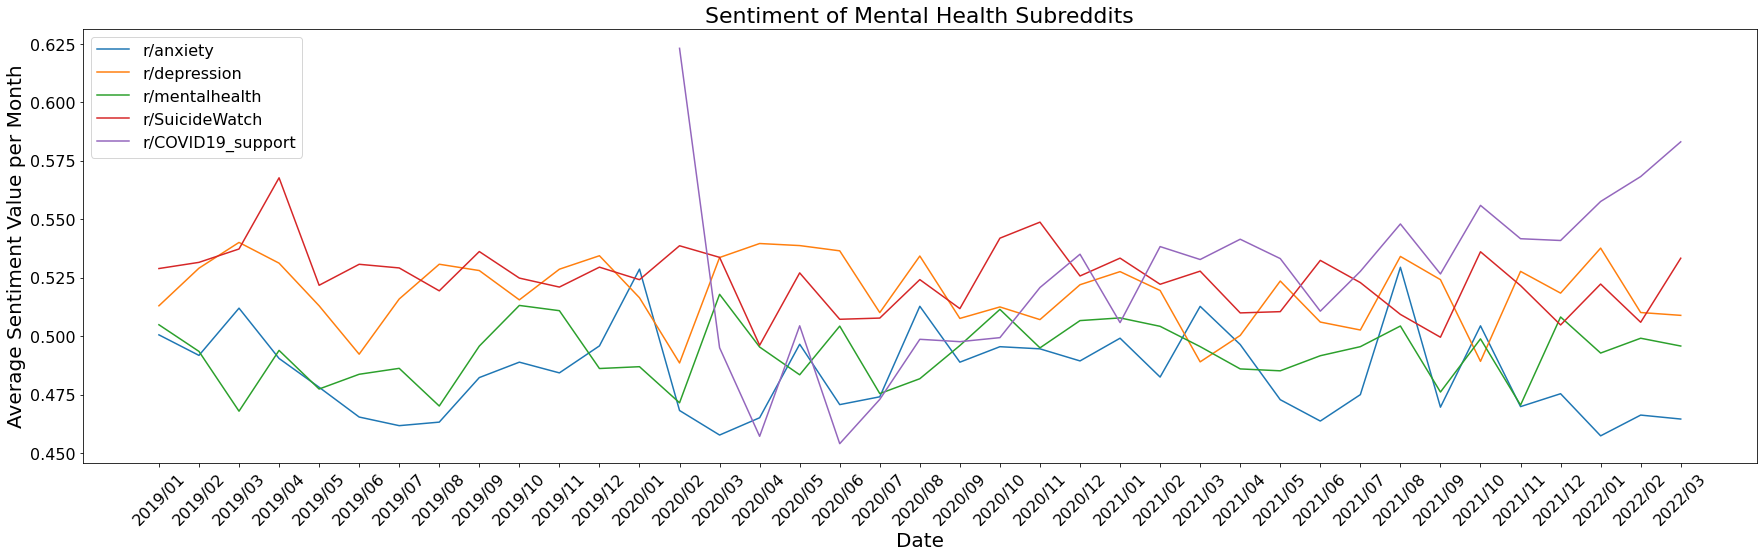

In [167]:
from matplotlib.axis import Axis
fig = plt.figure(1,figsize=(30,8))
ax = fig.add_subplot()

#Anxiety
anxiety_x = anxiety_list
anxiety_y = anxiety_dict_month.values()
ax.plot(anxiety_x,anxiety_y)

#Depression
depression_x = depression_list
depression_y = depression_dict_month.values()
ax.plot(depression_x,depression_y)

#MentalHealth
mentalhealth_x = mentalhealth_list 
mentalhealth_y = mentalhealth_dict_month.values()
ax.plot(mentalhealth_x,mentalhealth_y)

#SuicideWatch
suicidewatch_x = suicidewatch_list 
suicidewatch_y = suicidewatch_dict_month.values()
ax.plot(suicidewatch_x,suicidewatch_y)

#COVID19_support
COVID19_support_x = COVID19_support_list 
COVID19_support_y = COVID19_support_dict_month.values()
ax.plot(COVID19_support_x ,COVID19_support_y)

ax.set_xticks(anxiety_list[::1])
ax.set_xticklabels(anxiety_list[::1], rotation=45, fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

plt.title('Sentiment of Mental Health Subreddits', fontsize = 22)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Sentiment Value per Month', fontsize = 20)

plt.legend(['r/anxiety', 'r/depression', 'r/mentalhealth', 'r/SuicideWatch', 'r/COVID19_support'], loc = 'upper left', fontsize = 16)

plt.show()

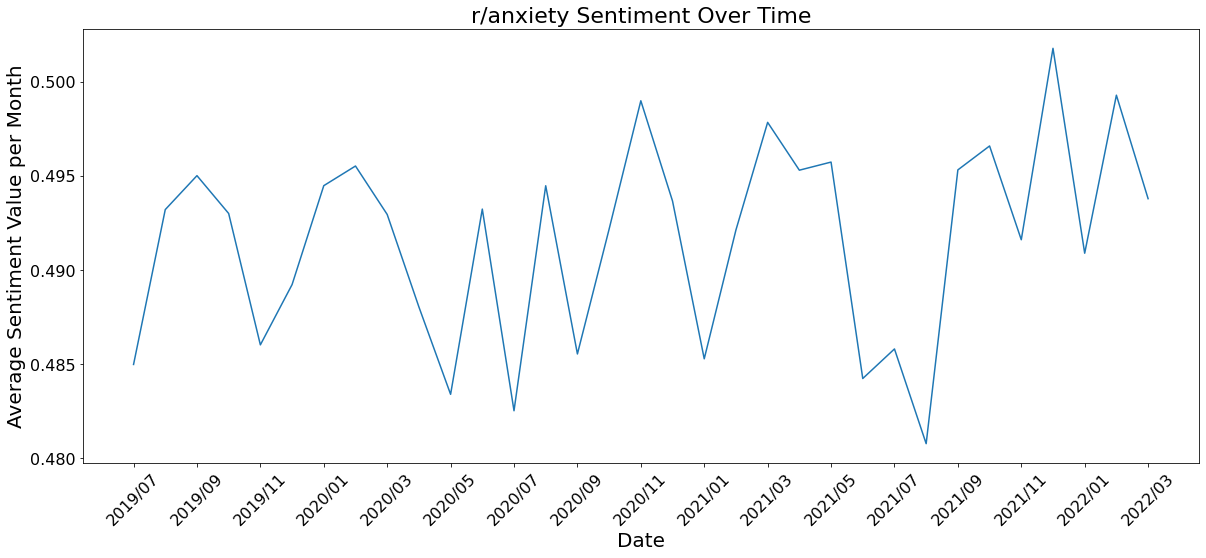

In [105]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot()
anxiety_x = anxiety_list
anxiety_y = anxiety_dict_month.values()
plt.plot(anxiety_x,anxiety_y)

ax.set_xticks(anxiety_list[::2])
ax.set_xticklabels(anxiety_list[::2], rotation=45, fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

plt.title('r/anxiety Sentiment Over Time', fontsize = 22)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Sentiment Value per Month', fontsize = 20)

plt.show()

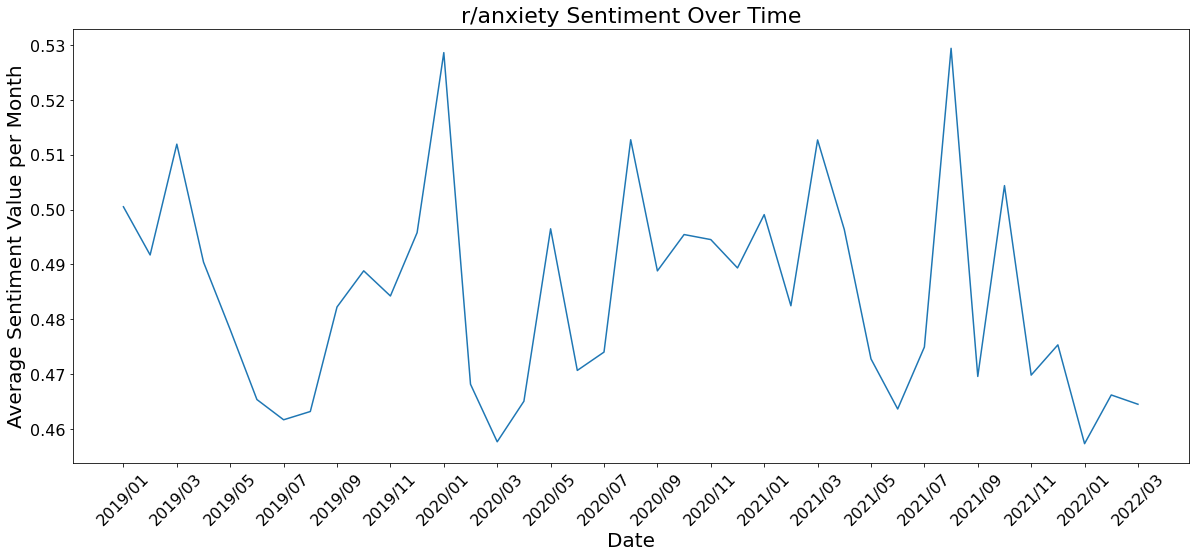

In [126]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot()
anxiety_x = anxiety_list
anxiety_y = anxiety_dict_month.values()
plt.plot(anxiety_x,anxiety_y)

ax.set_xticks(anxiety_list[::2])
ax.set_xticklabels(anxiety_list[::2], rotation=45, fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

plt.title('r/anxiety Sentiment Over Time', fontsize = 22)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Sentiment Value per Month', fontsize = 20)

plt.show()

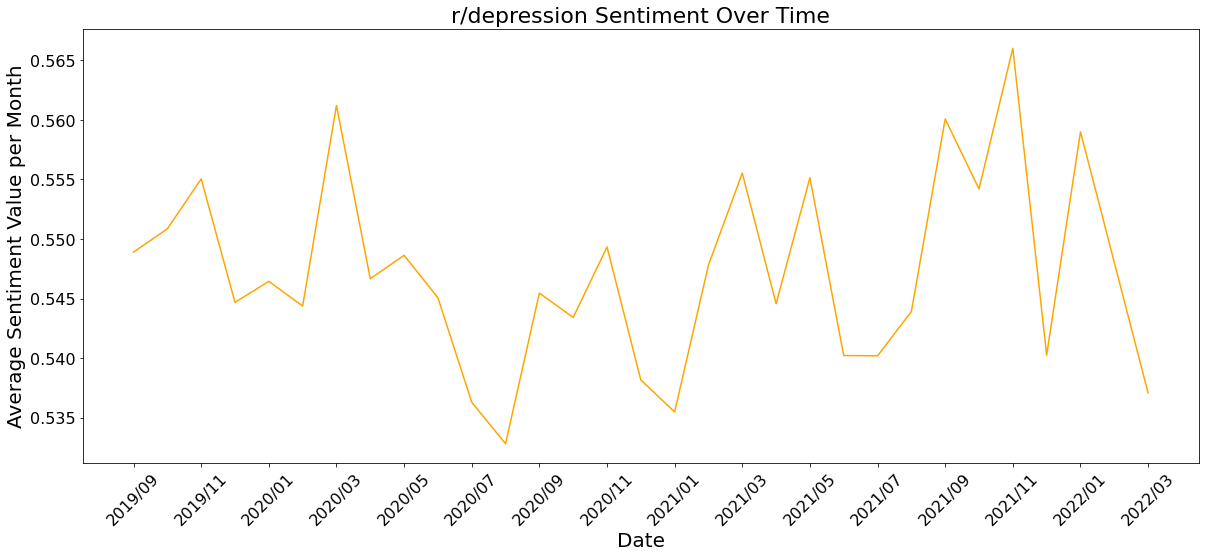

In [111]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot()
depression_x = depression_list
depression_y = depression_dict_month.values()
plt.plot(depression_x,depression_y, color = 'orange')

ax.set_xticks(depression_list[::2])
ax.set_xticklabels(depression_list[::2], rotation=45, fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

plt.title('r/depression Sentiment Over Time', fontsize = 22)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Sentiment Value per Month', fontsize = 20)

plt.show()

In [151]:
dep_mov_avg = mov_avg(depression_dict_month)

/Users/justinchen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


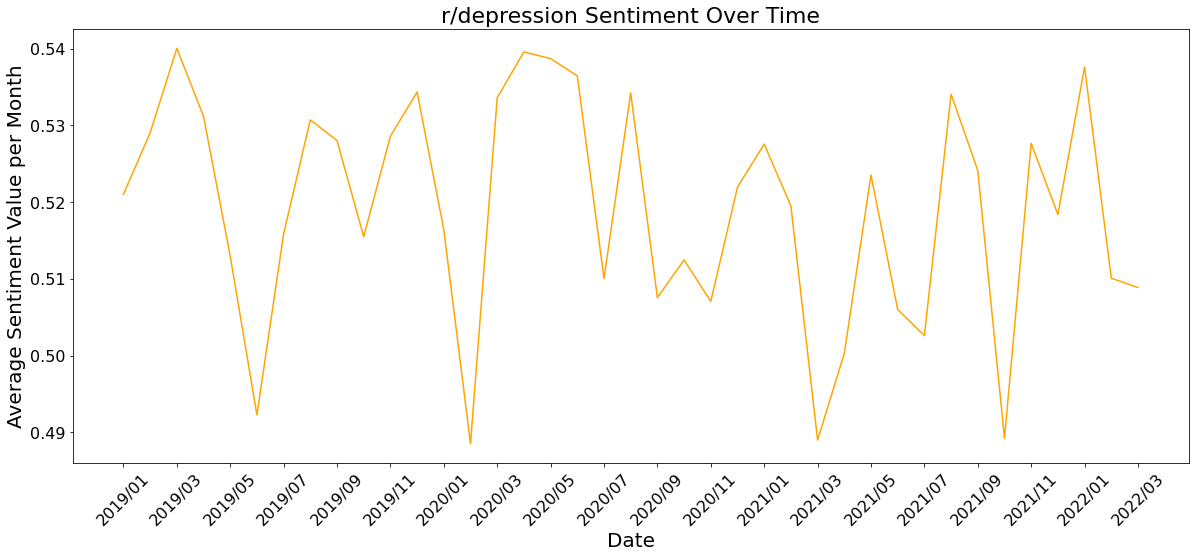

In [148]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot()
depression_x = depression_list
depression_y = dep_mov_avg.values()
plt.plot(depression_x,depression_y, color = 'orange')

ax.set_xticks(depression_list[::2])
ax.set_xticklabels(depression_list[::2], rotation=45, fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

plt.title('r/depression Sentiment Over Time', fontsize = 22)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Sentiment Value per Month', fontsize = 20)

plt.show()

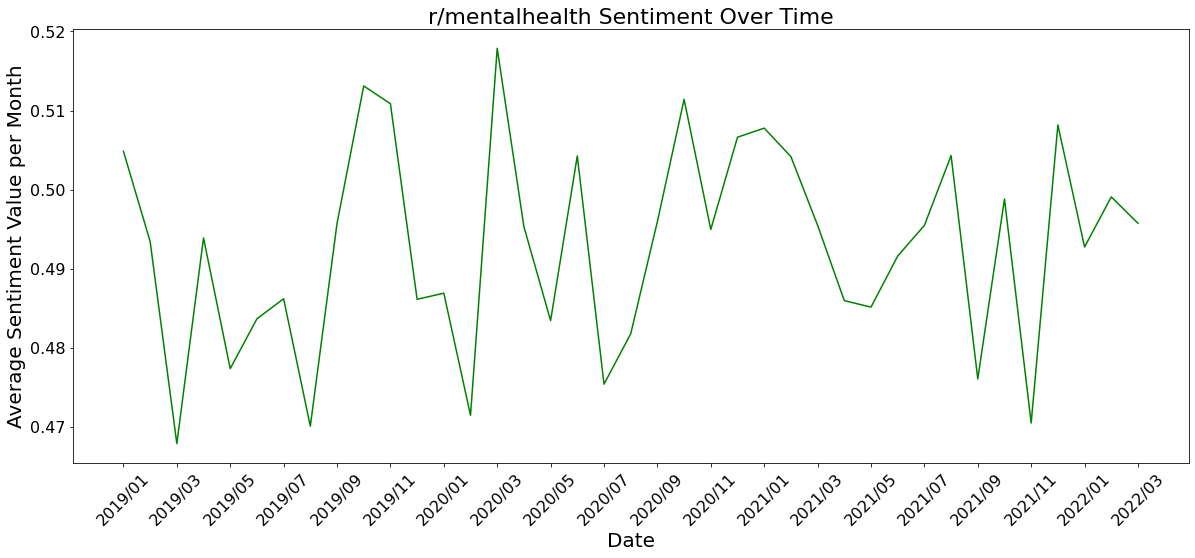

In [107]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot()
mentalhealth_x = mentalhealth_list 
mentalhealth_y = mentalhealth_dict_month.values()
plt.plot(mentalhealth_x,mentalhealth_y, color='green')

ax.set_xticks(mentalhealth_list[::2])
ax.set_xticklabels(mentalhealth_list[::2], rotation=45, fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

plt.title('r/mentalhealth Sentiment Over Time', fontsize = 22)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Sentiment Value per Month', fontsize = 20)

plt.show()

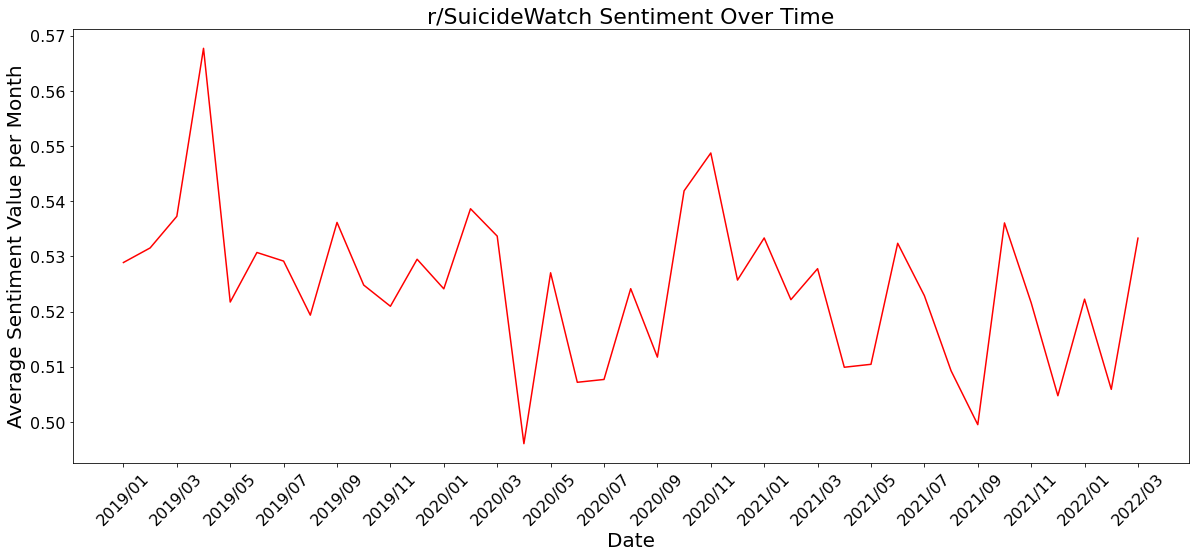

In [108]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot()
suicidewatch_x = suicidewatch_list 
suicidewatch_y = suicidewatch_dict_month.values()
plt.plot(suicidewatch_x,suicidewatch_y, color = 'red')

ax.set_xticks(suicidewatch_list[::2])
ax.set_xticklabels(suicidewatch_list[::2], rotation=45, fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

plt.title('r/SuicideWatch Sentiment Over Time', fontsize = 22)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Sentiment Value per Month', fontsize = 20)

plt.show()

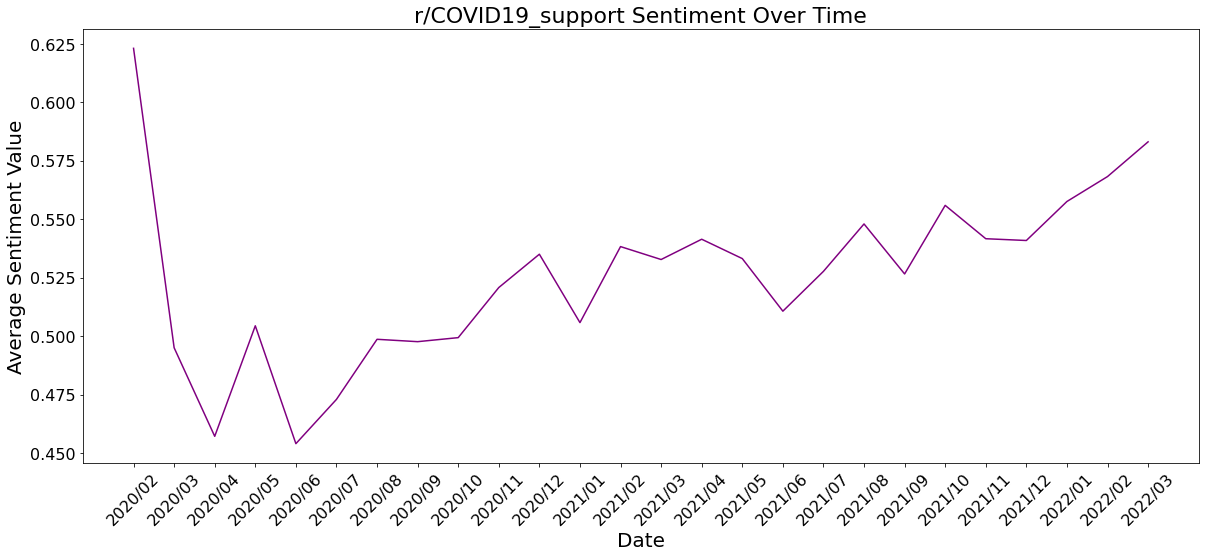

In [112]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot()
COVID19_support_x = COVID19_support_list 
COVID19_support_y = COVID19_support_dict_month.values()
plt.plot(COVID19_support_x,COVID19_support_y, color = 'purple')

ax.set_xticks(COVID19_support_list[::])
ax.set_xticklabels(COVID19_support_list[::], rotation=45, fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

plt.title('r/COVID19_support Sentiment Over Time', fontsize = 22)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Sentiment Value', fontsize = 20)

plt.show()

## By Day

In [76]:
anxiety_list = str_list(anxiety_dict_day)
depression_list = str_list(depression_dict_day)
mentalhealth_list = str_list(mentalhealth_dict_day)
suicidewatch_list = str_list(suicidewatch_dict_day)
COVID19_support_list = str_list(COVID19_support_dict_day)

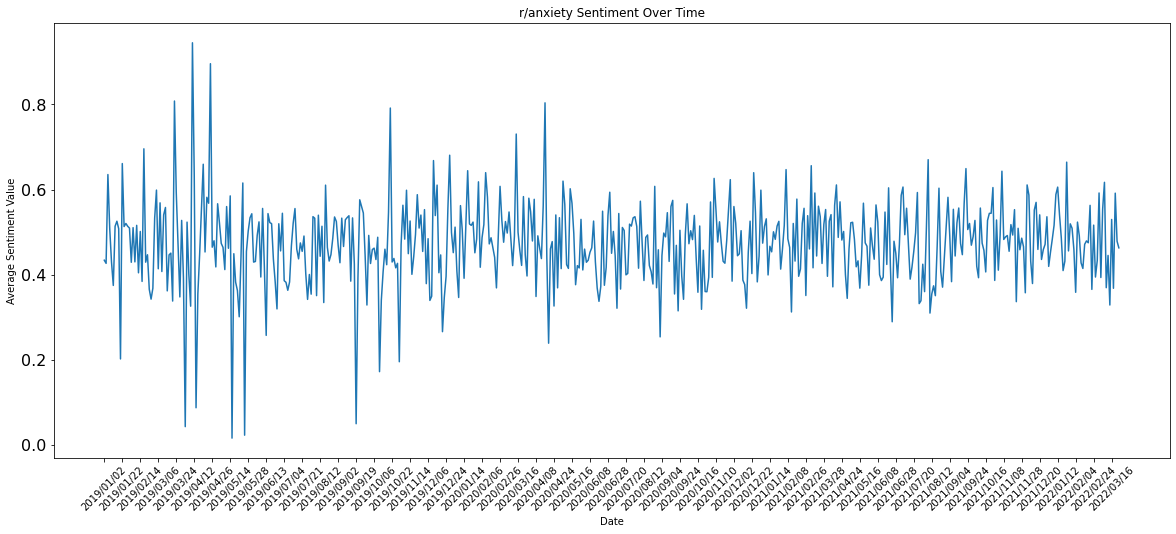

In [78]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot()
anxiety_x = anxiety_list
anxiety_y = anxiety_dict_day.values()
plt.plot(anxiety_x,anxiety_y)

# anx_month_x = anxiety_list
# anx_month_y = anxiety_dict.values()
# plt.plot(anx_month_x,anx_month_y)

ax.set_xticks(anxiety_list[::10])
ax.set_xticklabels(anxiety_list[::10], rotation=45)
ax.tick_params(axis='y', labelsize=16)

plt.title('r/anxiety Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Value')

plt.show()

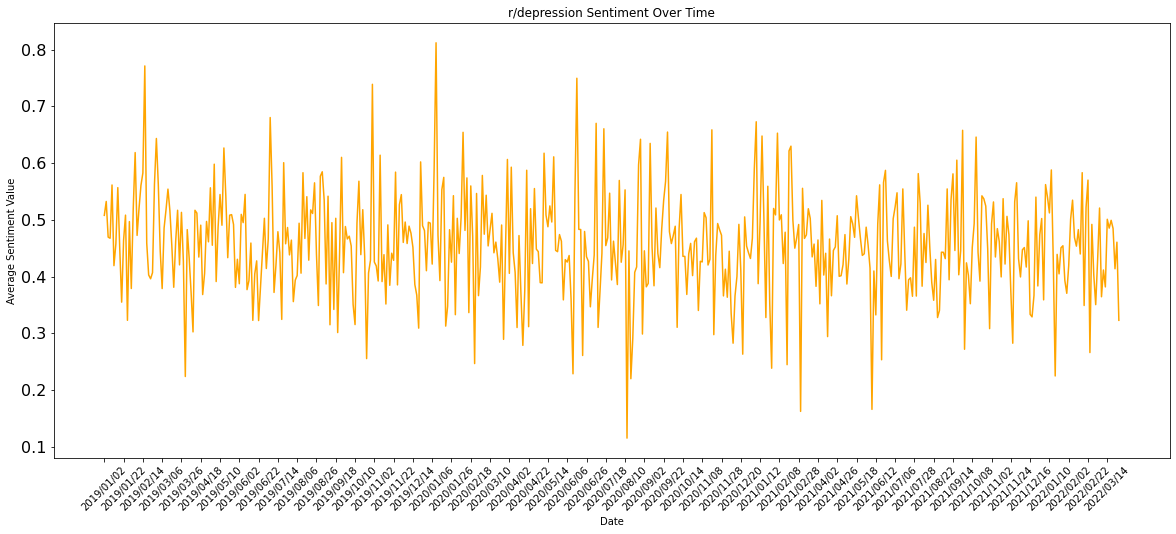

In [79]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot()
depression_x = depression_list
depression_y = depression_dict_day.values()
plt.plot(depression_x,depression_y, color = 'orange')

ax.set_xticks(depression_list[::10])
ax.set_xticklabels(depression_list[::10], rotation=45)
ax.tick_params(axis='y', labelsize=16)

plt.title('r/depression Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Value')

plt.show()

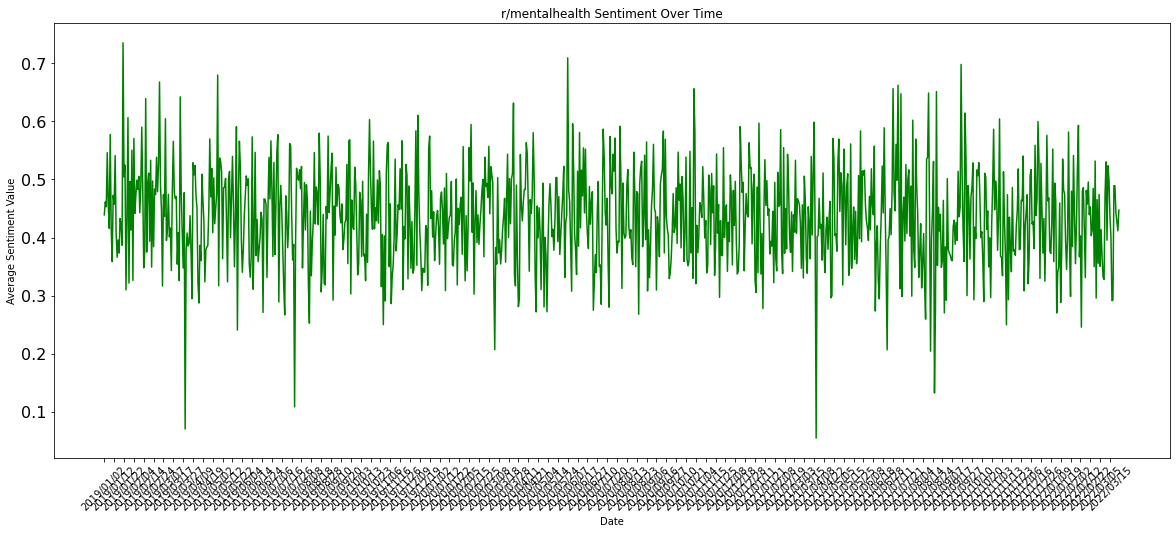

In [80]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot()
mentalhealth_x = mentalhealth_list 
mentalhealth_y = mentalhealth_dict_day.values()
plt.plot(mentalhealth_x,mentalhealth_y, color='green')

ax.set_xticks(mentalhealth_list[::10])
ax.set_xticklabels(mentalhealth_list[::10], rotation=45)
ax.tick_params(axis='y', labelsize=16)

plt.title('r/mentalhealth Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Value')

plt.show()

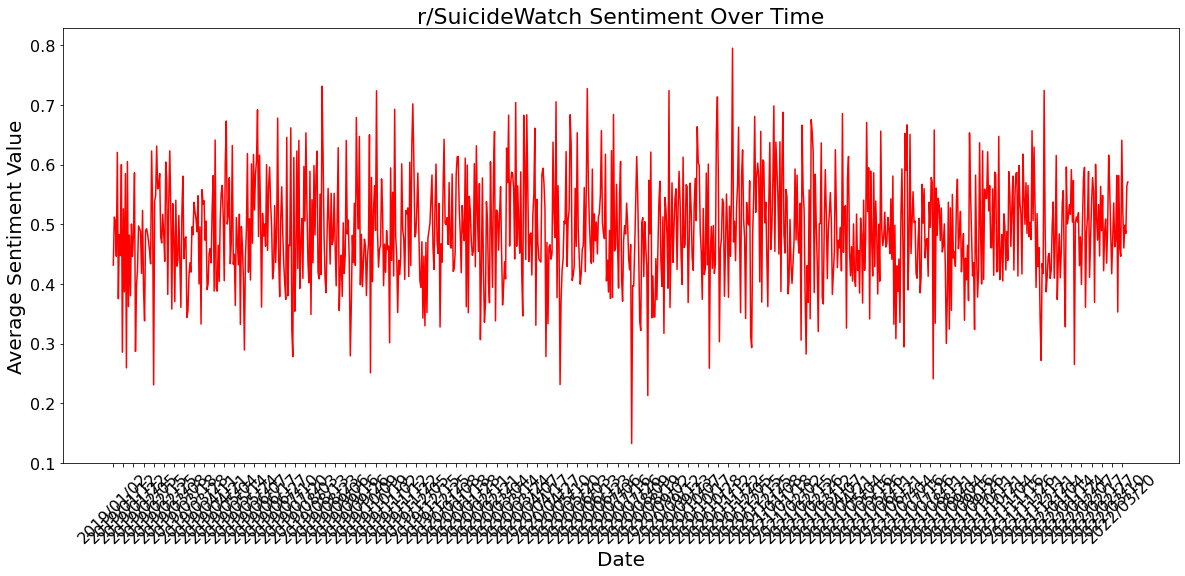

In [81]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot()
suicidewatch_x = suicidewatch_list 
suicidewatch_y = suicidewatch_dict_day.values()
plt.plot(suicidewatch_x,suicidewatch_y, color = 'red')

ax.set_xticks(suicidewatch_list[::10])
ax.set_xticklabels(suicidewatch_list[::10], rotation=45, fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

plt.title('r/SuicideWatch Sentiment Over Time', fontsize = 22)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Sentiment Value', fontsize = 20)

plt.show()

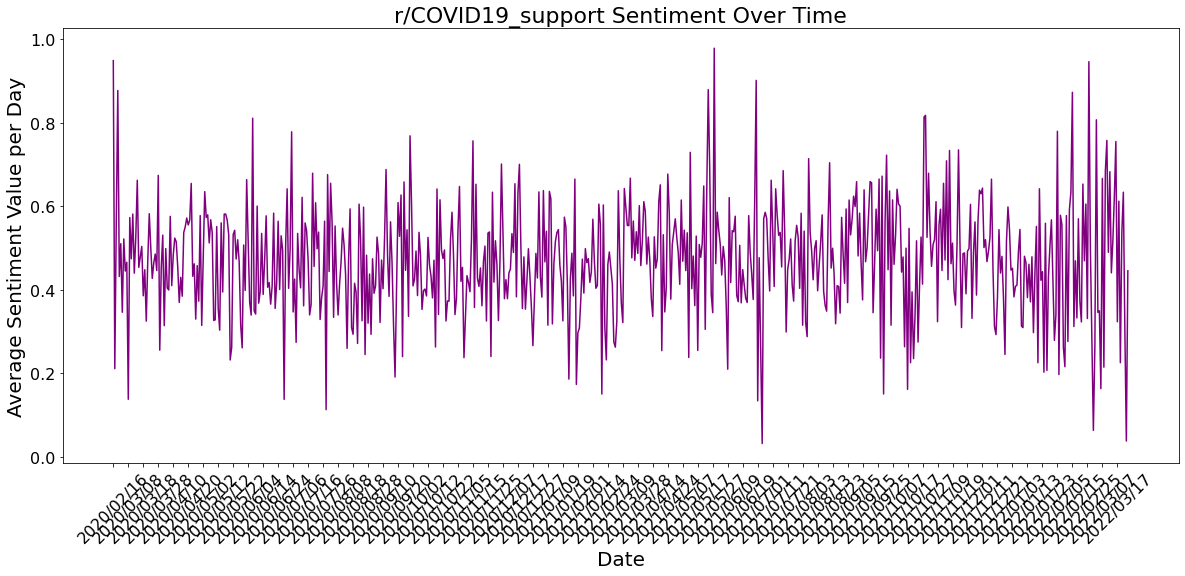

In [82]:
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot()
COVID19_support_x = COVID19_support_list 
COVID19_support_y = COVID19_support_dict_day.values()
plt.plot(COVID19_support_x,COVID19_support_y, color = 'purple')

ax.set_xticks(COVID19_support_list[::10])
ax.set_xticklabels(COVID19_support_list[::10], rotation=45, fontsize = 16)
ax.tick_params(axis='y', labelsize=16)

plt.title('r/COVID19_support Sentiment Over Time', fontsize = 22)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Sentiment Value per Day', fontsize = 20)

plt.show()